<a href="https://colab.research.google.com/github/MARTINROCA/Online_Shoppers_Intention/blob/main/Trabajo_Final_Roca_Martin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción
* Contexto empresarial: la empresa se dedica a la venta online de productos y se tomaron datos de diferentes usuarios en el período de un año. Cada registro corresponde a una sesión de usuarios distintos

* Contexto analítico: Se nos proporciona un archivo csv con las operaciones que realizó cada usuario en donde se registraron distintos indicadores y si la persona terminó adquiriendo el producto o no.

# Hipótesis:
* A mayor tiempo de duración en páginas similares mayor probabilidad de venta
* Mayor ExitRate menor probabilidad de compra
* Mayor PageValue mayor probabilidad de compra
* Las ventas crecen los fines de semana y los períodos anteriores a días especiales
* Hay estacionalidad en las compras
* La mayoria de las compras las realizan al volver a visitar la pagina

In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
! pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 493.7 kB/s eta 0:00:00


In [3]:
! pip install bqplot
! pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=93a3d6be136f64ef1307eecf126d55b7016c56090bc1a50a81ab689a5859445f
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [4]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 22.6 MB 22.4 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 20.8 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357350 sha256=fdec8bd14248e50e5b1f81f5e8ff57b867a6123865bf8733a022cdfda0351679
  Stored in directory: /tmp/pip-ephem-wheel-cache-sq9l2vpf/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=fc9c397eeeb0156efd907c733a7afda860e0e0aac5111765570c49158ebbd851
  Stored in directory: /root/.

In [5]:
import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as sm
import chart_studio.plotly as py
import os
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
bokeh.io.output_notebook(INLINE)
from itertools import count
import warnings
warnings.filterwarnings("ignore")
import pandas_profiling
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

In [6]:
df1 = pd.read_csv('/content/gdrive/MyDrive/DATA SCIENCE/online_shoppers_intention.csv')

Descripción de las columnas del dataset

In [7]:
d_desc = {'Administrative':'number of pages of this type (administrative) that the user visited.',
          'Administrative_Duration':'the amount of time spent in this category of pages.',
          'Informational':' the number of pages of this type (informational) that the user visited.',
          'Informational_Duration':'the amount of time spent in this category of pages.',
          'ProductRelated':' the number of pages of this type (product related) that the user visited. ',
          'ProductRelated_Duration':' the amount of time spent in this category of pages.',
          'BounceRates':'The percentage of visitors who enter the website through that page and exit without triggering any additional tasks. ',
          'ExitRates':'The percentage of pageviews on the website that end at that specific page.',
          'PageValues':'The average value of the page averaged over the value of the target page and/or the completion of an eCommerce',
          'SpecialDay':'closeness of the browsing date to special days or holidays in ',
          'Month':'the month the pageview occurred',
          'OperatingSystems':'An integer value representing the operating system that the user was on when viewing the page',
          'Browser':'the browser that the user was using to view the page. ',
          'Region':' integer value representing which region the user is located in ',
          'TrafficType':'An integer value representing what type of traffic the user is categorized into.',
          'VisitorType':'whether a visitor is New Visitor, Returning Visitor, or Other ',
          'Weekend':' boolean representing whether the session is on a weekend.',
          'Revenue':'boolean representing whether or not the user completed the purchase.'}

In [8]:
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
df1.shape

(12330, 18)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Separación de datos numéricos y categóricos en dos data frames distintos para análisis particulares a cada tipo de dato

### Selección datos numéricos

In [11]:
df_num = df1.select_dtypes('number')
df_num['Revenue'] = df1['Revenue']
df_num.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,False


### Selección datos categóricos

### Valores duplicados

In [12]:
df_num.drop_duplicates(inplace=True)

In [13]:
len(df_num)

12016

Se eliminan los valores duplicados pasando a tener un dataset de 12016 registros, frente al original de 12330.

# Análisis Univariado

In [14]:
col_categ = ['Month', 'VisitorType', 'Weekend', 'Revenue']

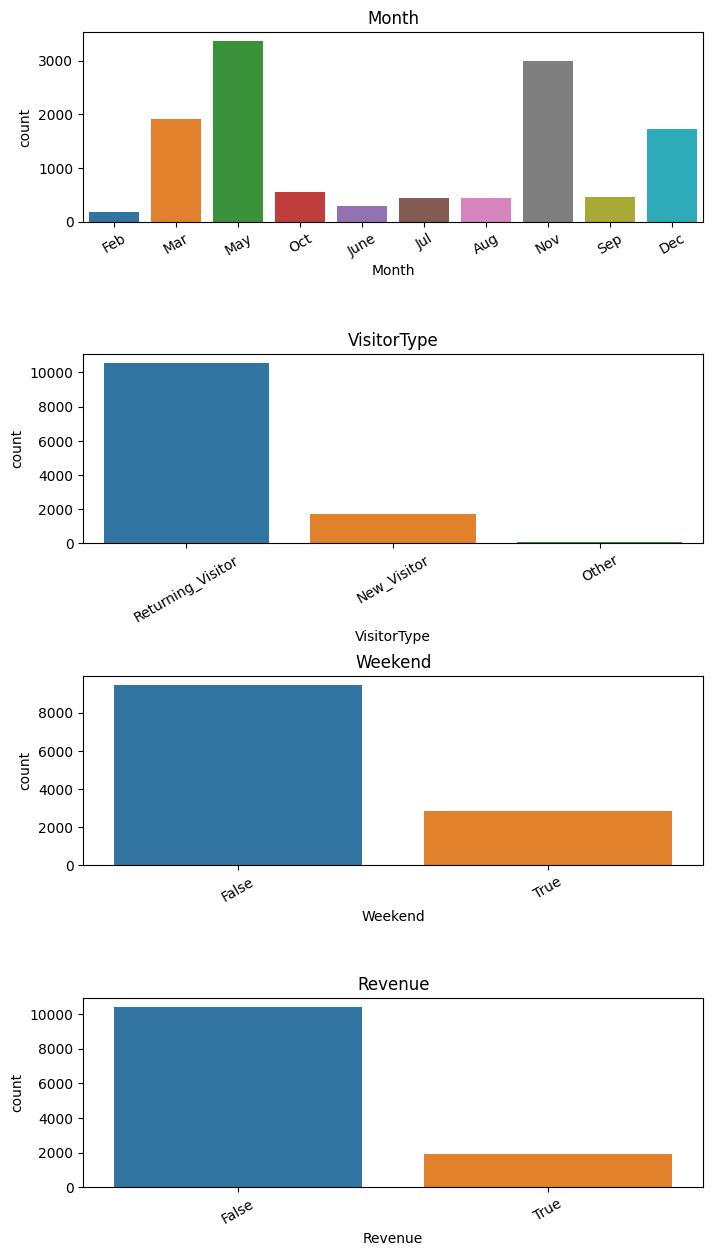

In [15]:
fig, ax = plt.subplots(nrows=len(col_categ), ncols=1, figsize=(8,15))
fig.subplots_adjust(hspace=0.7)

for i,col in enumerate(col_categ):
    sns.countplot(x=col, data=df1, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

([<matplotlib.axis.XTick at 0x7fcec411fbb0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

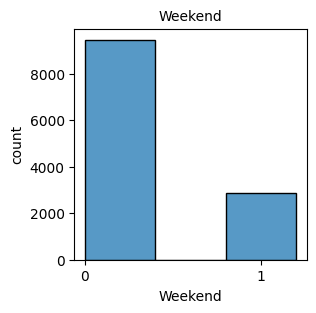

In [16]:
f, axs = plt.subplots(figsize=(3, 3))
sns.histplot(df1['Weekend'], binwidth=0.4, palette='pastel')
plt.title('Weekend', fontsize = 10)
plt.xlabel('Weekend', fontsize = 10)
plt.ylabel('count', fontsize = 10)
plt.xticks([0,1])

### Observaciones:

- **Month**: La variable muestra niveles importantes de actividad en los meses de Marzo, Mayo, Noviembre y Diciembre respecto del resto. Además se destaca que no hay datos ni en Enero ni en Abril.

- **VisitorType**: La mayoría de los usuarios son usuarios previos, hay muy poco ingreso de nuevos usuarios, sería bueno incrementar el ingreso de nuevos consumidores.

- **Weekend**: No se observa mayor flujo de ingresos a la web durante los fines de semana.

- **Revenue**: Aproximadamente un 20% de las visitas terminan con una compra de producto

In [17]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12016.0,2.375666,3.343483,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12016.0,82.930548,178.584445,0.0,0.000000,11.000000,96.500000,3398.750000
Informational,12016.0,0.516728,1.284001,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12016.0,35.373225,142.464803,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12016.0,32.531708,44.772915,0.0,8.000000,19.000000,39.000000,705.000000
ProductRelated_Duration,12016.0,1225.963124,1928.617897,0.0,207.563103,630.413333,1501.208333,63973.522230
BounceRates,12016.0,0.017595,0.039660,0.0,0.000000,0.002632,0.015385,0.200000
ExitRates,12016.0,0.039000,0.042056,0.0,0.013947,0.025000,0.046154,0.200000
PageValues,12016.0,6.043155,18.784765,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12016.0,0.062883,0.201055,0.0,0.000000,0.000000,0.000000,1.000000


Observaciones iniciales sobre cuadro:
- Se observa una diferencia relativa importante entre el valor máximo y el promedio en las variables Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration. En particular las variables Informational parecen presentar en su mayoría valores cero, ya que se encuentran hasta su tercer cuartil. Deberemos analizar posible tratamiento de Outliers sobre las mismas.
- PageValues y SpecialDay también presentan valores cero hasta su tercer cuartil.

In [18]:
col_num = ['Administrative','Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated',
           'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser',
           'Region', 'TrafficType']

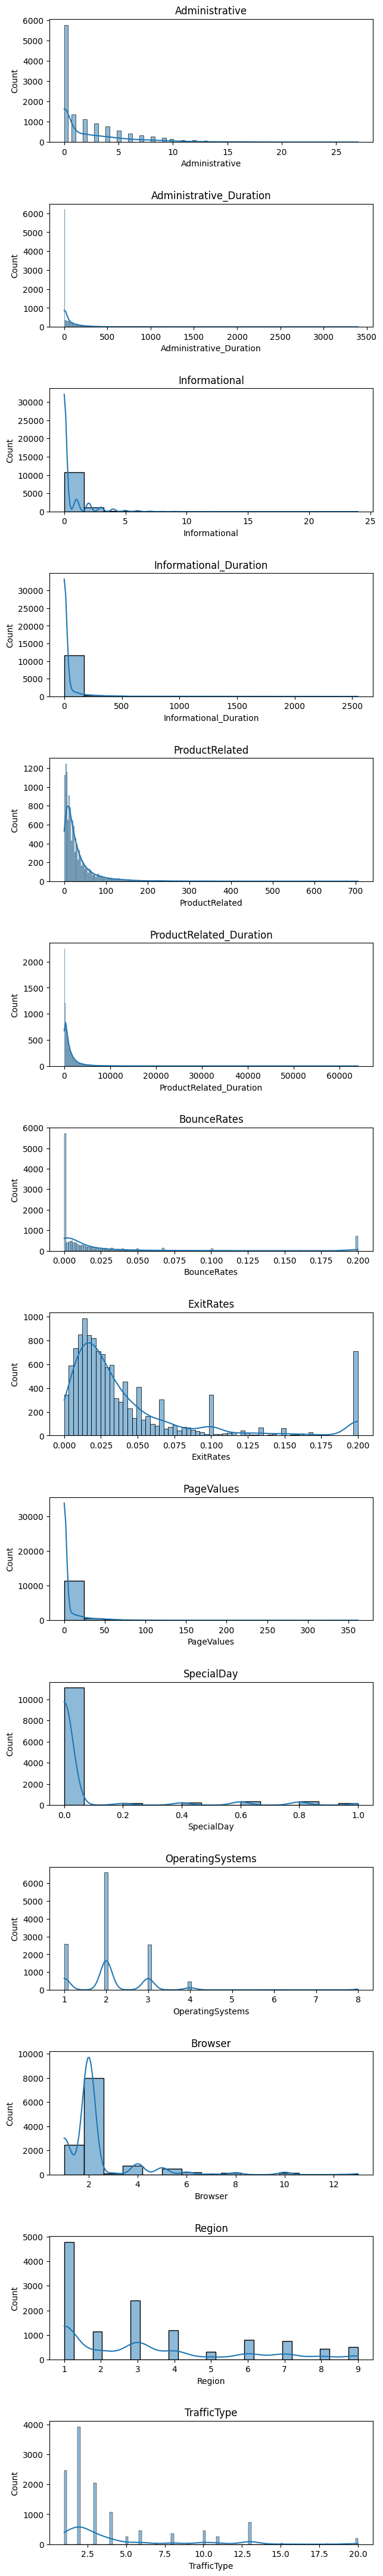

In [19]:
fig, ax = plt.subplots( nrows=len(col_num), figsize=(7,55))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate (col_num):
    sns.histplot(x=col, data=df1, ax=ax[i], kde=True)
    ax[i].set_title(col)


### Observacciones:
* **Administrative y Administrative_Duration, Information y Information_Duration**: Las 4 variables presentan gran cantidad de valores cero, analizar relación con variable a predecir.
* **ProductRelated y Duration**: se observan outliers cuando los potenciales clientes ven muchos productos relacionados y pasan mucho tiempo, sin embargo se espera que puedan ser datos importantes y muy relacionados a la compra final
* **SpecialDay**: ocurre lo mismo, los valores mayores a 0 se presentan como outliers pero debemos ver si tienen mucha relación con la compra final
* **Region, Browser, Traffic Type y OperatingSystems**: se observan casos donde no se realizan muchas transacciones. Se recomienda realizar algún tratamiento de Outliers.
* Las variables restantes no presentan observaciones relevantes, se analizará su relación respecto a la variable a predecir.

### Análisis Bivariado

ProductRelated  the number of pages of this type (product related) that the user visited. 


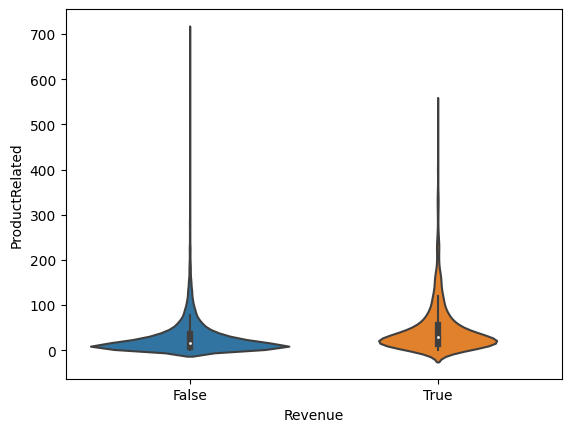

ProductRelated_Duration  the amount of time spent in this category of pages.


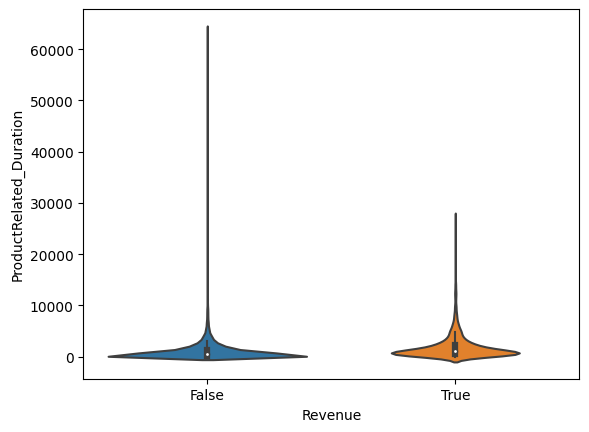

SpecialDay closeness of the browsing date to special days or holidays in 


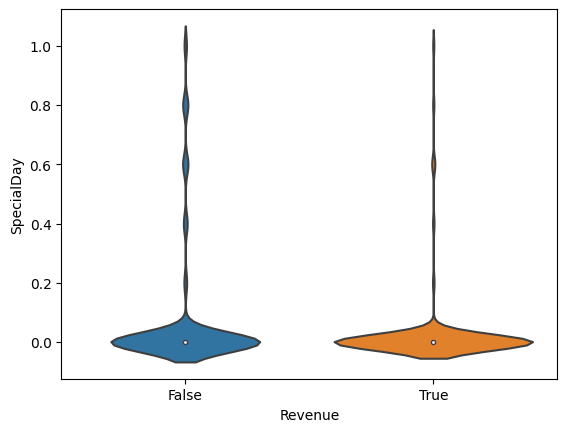

Region  integer value representing which region the user is located in 


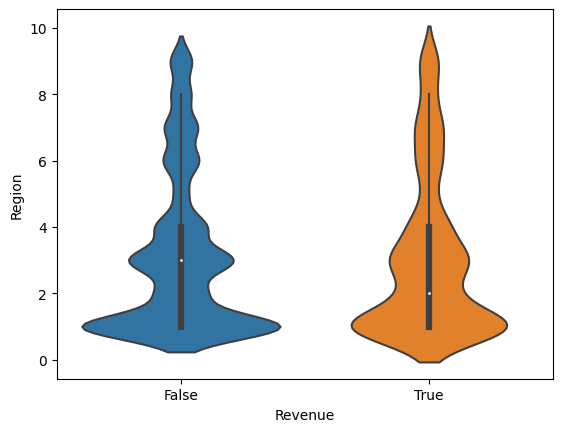

Browser the browser that the user was using to view the page. 


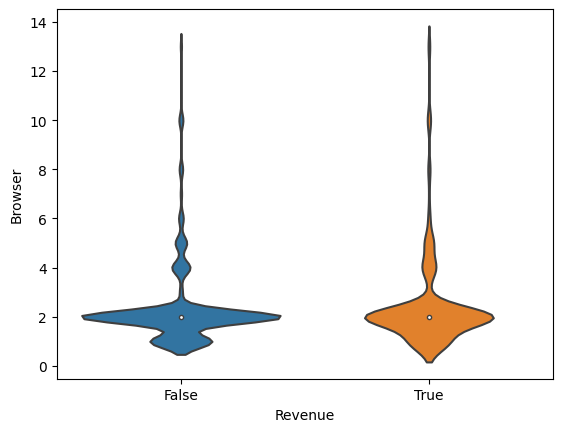

OperatingSystems An integer value representing the operating system that the user was on when viewing the page


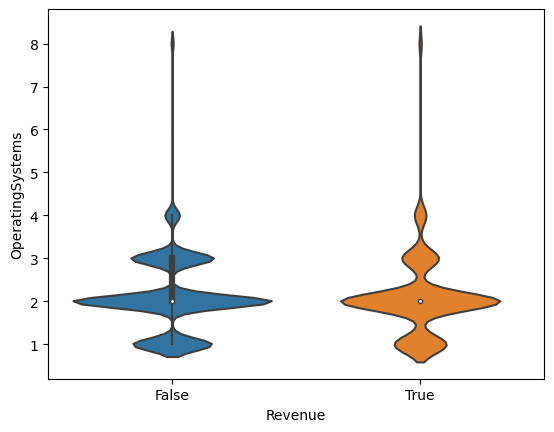

In [20]:
for col in ['ProductRelated', 'ProductRelated_Duration', 'SpecialDay', 'Region', 'Browser', 'OperatingSystems']:
    print(col, d_desc[col])
    sns.violinplot(x='Revenue', y=col, data=df_num)
    plt.show()

Reemplazamos los Outliers de ProductRelated_Duration por el tope intercuartil

In [21]:
Q1 = df1['ProductRelated_Duration'].quantile(0.25)
Q3 = df1['ProductRelated_Duration'].quantile(0.75)

IQR = Q3-Q1

tope = Q3+1.5*IQR
tope


3384.1867837500004

In [22]:
df_num['ProductRelated_Duration_tope'] = df_num['ProductRelated_Duration']
df_num.loc[df_num['ProductRelated_Duration_tope']>tope, 'ProductRelated_Duration_tope'] = tope

### Cambiamos variable Revenue a numérica

In [23]:
df_num.Revenue.unique()

array([False,  True])

In [24]:
df_num.Revenue.value_counts()

False    10108
True      1908
Name: Revenue, dtype: int64

In [25]:
df_num['Revenue'] = df_num['Revenue'].astype(int)

In [26]:
df_num.Revenue.unique()

array([0, 1])

In [27]:
df_num.Revenue.value_counts()

0    10108
1     1908
Name: Revenue, dtype: int64

([<matplotlib.axis.XTick at 0x7fcea67b1450>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

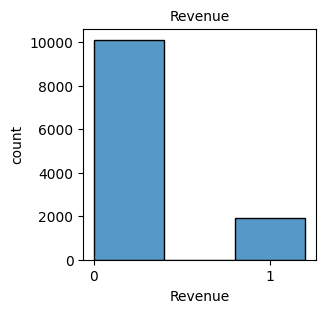

In [28]:
f, axs = plt.subplots(figsize=(3, 3))
sns.histplot(df_num['Revenue'], binwidth=0.4)
plt.title('Revenue', fontsize = 10)
plt.xlabel('Revenue', fontsize = 10)
plt.ylabel('count', fontsize = 10)
plt.xticks([0,1])

# Relación variables con variable a predecir

In [29]:
df_num.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue,ProductRelated_Duration_tope
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0.000000
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,64.000000
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0.000000
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,2.666667
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,0,627.500000


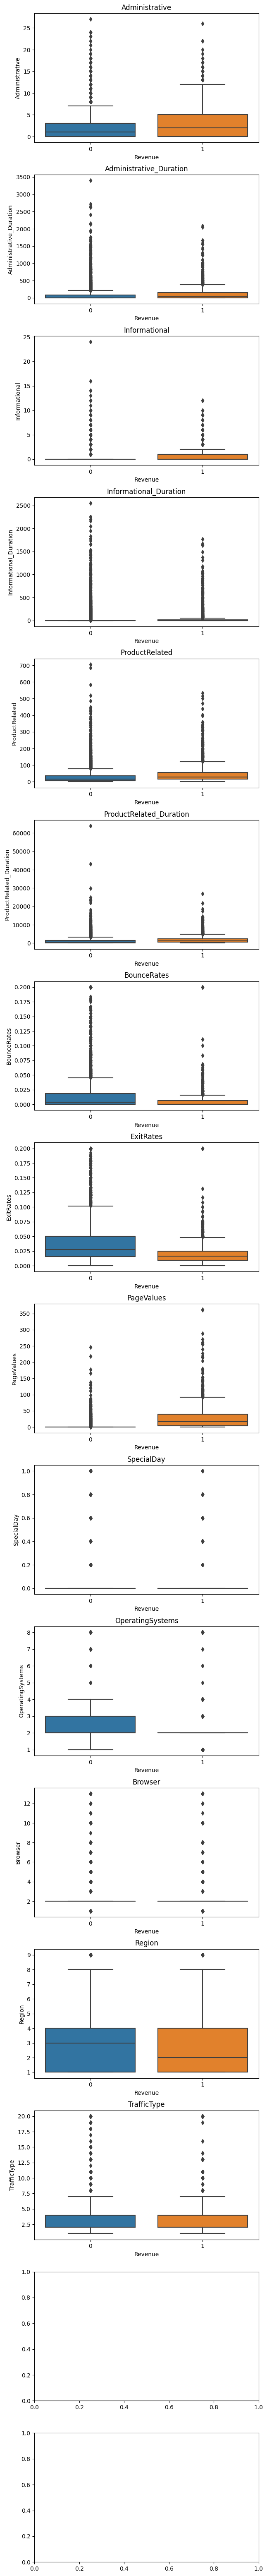

In [30]:
fig, ax = plt.subplots(nrows=len(df_num.columns), figsize=(7,80))
fig.subplots_adjust(hspace=0.25)

for i, col in enumerate(col_num):
    bplt = sns.boxplot(x='Revenue', y=col, data= df_num, ax=ax[i])
    ax[i].set_xlabel('Revenue')
    ax[i].set_title(col)

### Observaciones:
* **PageValues**: Esta variable parece ser la única que presenta relación directa con la variable a predecir

# Cálculo de Tasa de Conversión sobre una variable

In [31]:
def graficar_tasas_conversion(var_predictora, var_predecir, type='line', order=None):

    x,y = var_predictora, var_predecir

    grupo = df1.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()

    if type =='line':                        # PARA RANGOS CONTINUOS
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()

    elif type == 'bar':                     # PARA CATEGORÍAS O RANGOS
        plt.figure(figsize=(14,6))
        sns.barplot(x= var_predictora, y='tasa_conv', data=grupo, order=order)
        plt.grid()

    elif type == 'scatter':                 # PARA CATEGORIAS
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()

### Tasas de conversión sobre variables principales sobre las que se considera pueden tener relación sobre la decisión de compra final:

*   Month
*   VisitorType
* Weekend
* ProductRelated
* PageValues
* Region




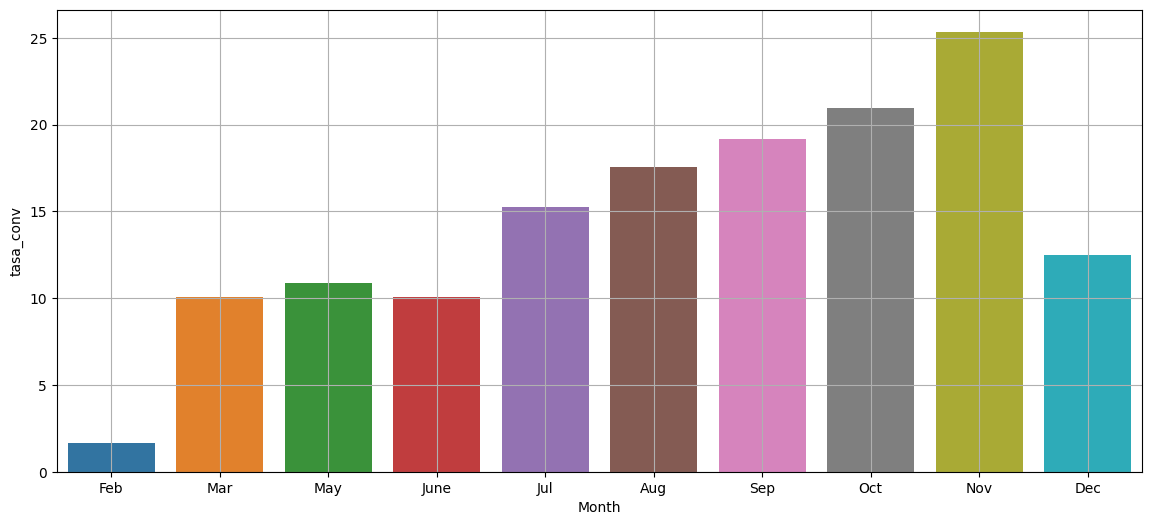

In [32]:
graficar_tasas_conversion('Month', 'Revenue', type='bar', order=['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])

In [33]:
month_count = df1.groupby('Month', as_index=False)['Revenue'].count()
month_count

,Month,Revenue
0,Aug,433
1,Dec,1727
2,Feb,184
3,Jul,432
4,June,288
5,Mar,1907
6,May,3364
7,Nov,2998
8,Oct,549
9,Sep,448


<Axes: xlabel='Month', ylabel='Revenue'>

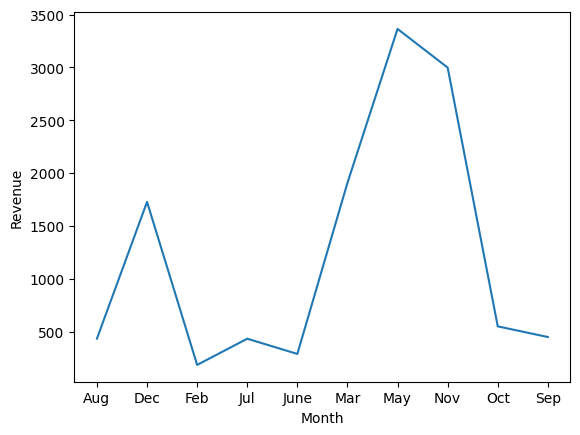

In [34]:
sns.lineplot(data=month_count, x="Month", y='Revenue', sort=False )

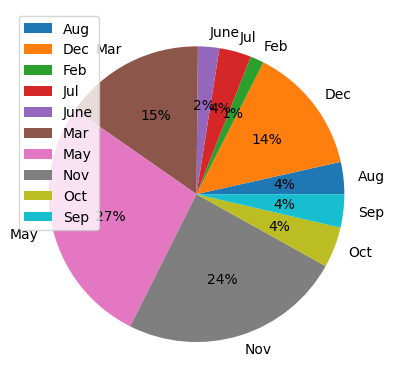

In [35]:
revenues = month_count['Revenue'].tolist()
labels = month_count['Month'].tolist()
plt.pie(revenues, labels= labels, autopct='%.0f%%')
plt.legend(loc= 'upper left')

### Month: se observa que los meses que más se utiliza la página son May, Nov, Mar y Dec. En esos 4 meses se acumula el 80% de las visitas.
Sin embargo, al observar la tasa de conversión deducimos que Jul, Aug, Sep, Oct y Nov, que son los meses de mayor tasa. Entre el 15% y 26% de las veces que se ingresa a la web se termina comprando el producto, son los meses con mayor decisión de compra.

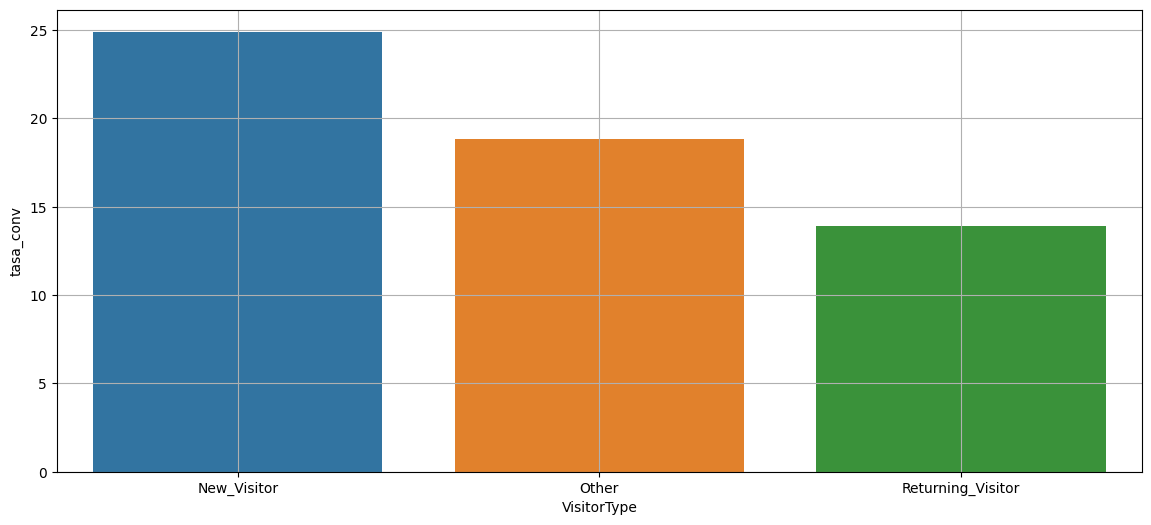

In [36]:
graficar_tasas_conversion('VisitorType', 'Revenue', type='bar')

**VisitorType**: contrario a lo esperado, los Returning Visitors son los de menor tasa de conversion, es decir, que sólo un 14% de los que vuelven terminan comprando.

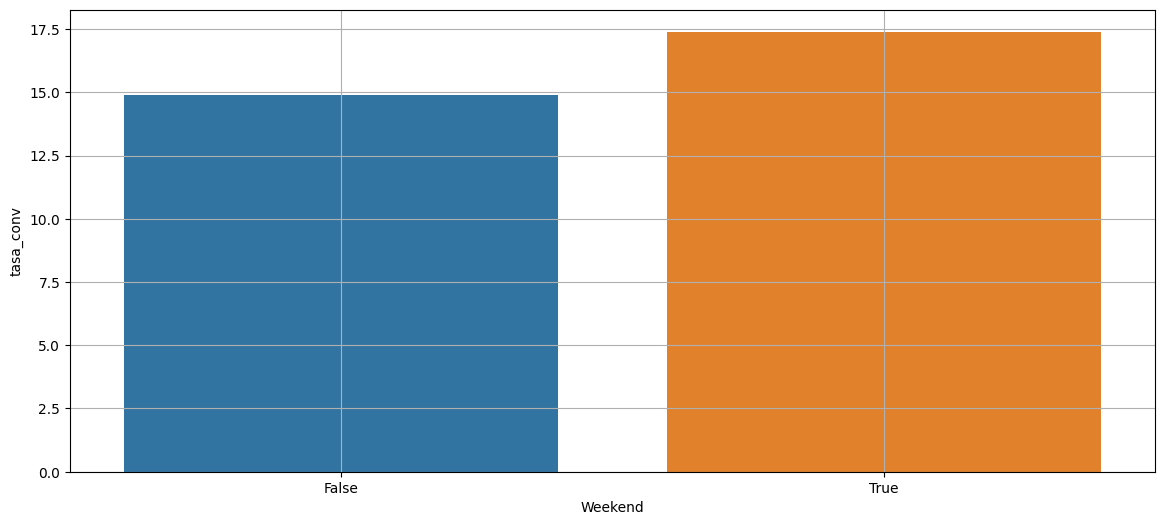

In [37]:
graficar_tasas_conversion('Weekend', 'Revenue', type='bar')

 the number of pages of this type (product related) that the user visited. 


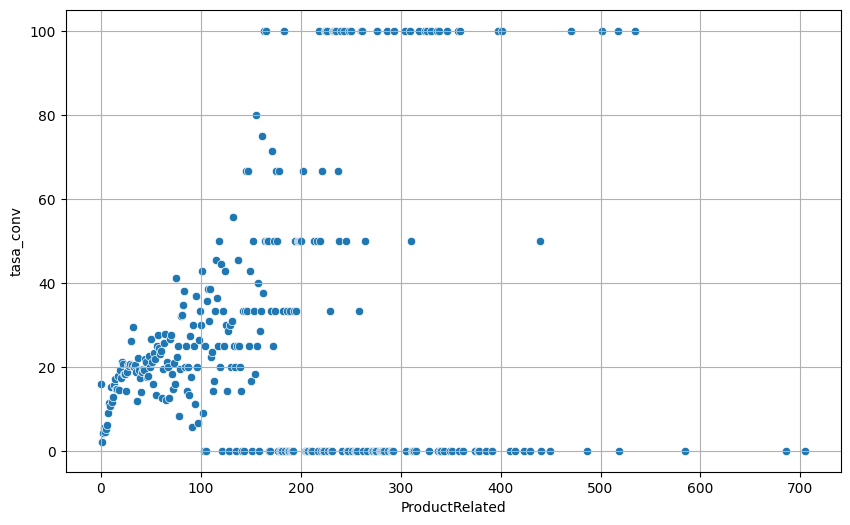

In [38]:
graficar_tasas_conversion('ProductRelated', 'Revenue', type='scatter')
print(d_desc['ProductRelated'])

Se crean grupos cada 150 para poder ver mejor la informacion

In [39]:
df1.loc[:,'grupos_ProductRelated']="0-150"
df1.loc[df1['ProductRelated']>150, 'grupos_ProductRelated']="151-300"
df1.loc[df1['ProductRelated']>300, 'grupos_ProductRelated']="301-450"
df1.loc[df1['ProductRelated']>450, 'grupos_ProductRelated']="451-600"
df1.loc[df1['ProductRelated']>600, 'grupos_ProductRelated']="601-750"

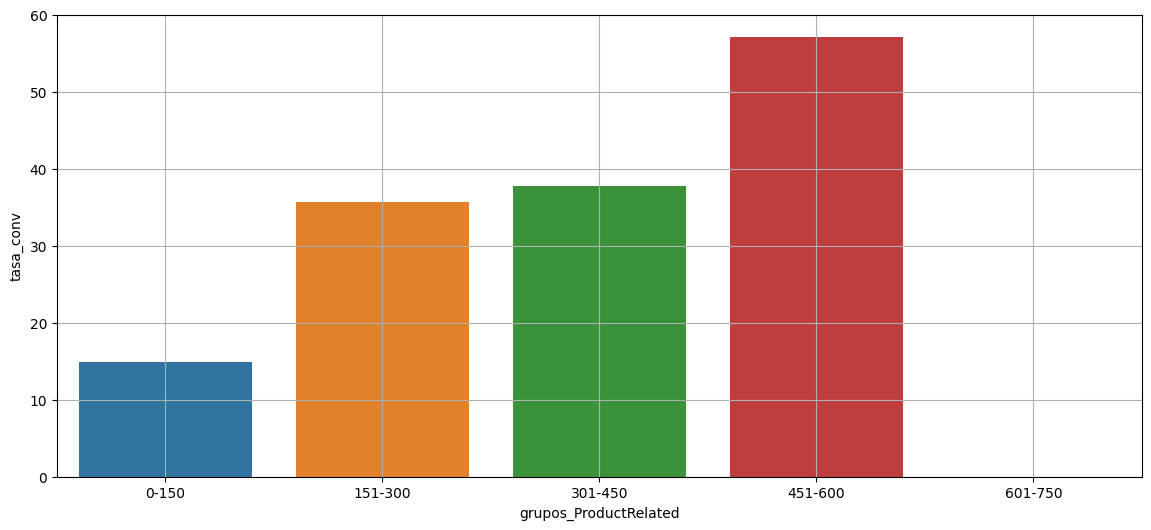

In [40]:
graficar_tasas_conversion('grupos_ProductRelated', 'Revenue', type='bar')

En estos grupos se observa que en el grupo entre 451-600 páginas visitadas de productos relacionados posee una alta tasa de compra final.

The average value of the page averaged over the value of the target page and/or the completion of an eCommerce


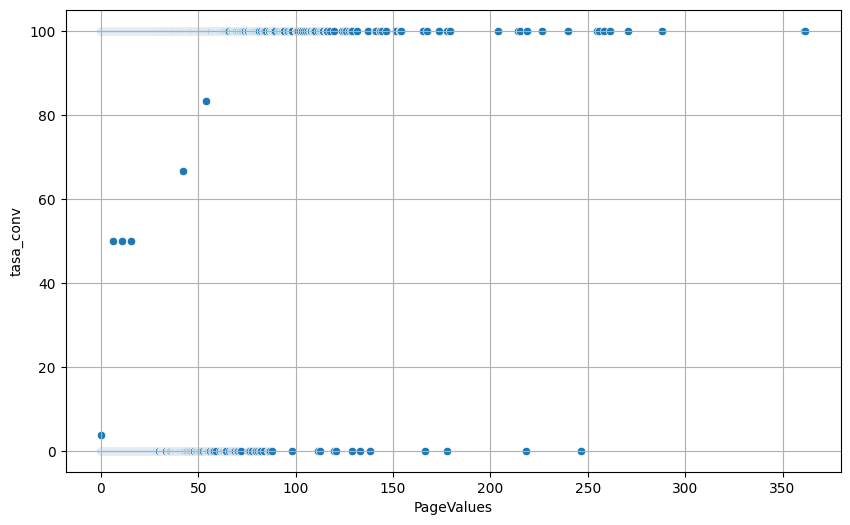

In [41]:
graficar_tasas_conversion('PageValues', 'Revenue', type='scatter')
print(d_desc['PageValues'])

In [42]:
df1.loc[:,'grupos_PageValues']="< 100"
df1.loc[df1['PageValues']>100, 'grupos_PageValues']="101-200"
df1.loc[df1['PageValues']>200, 'grupos_PageValues']="> 200"

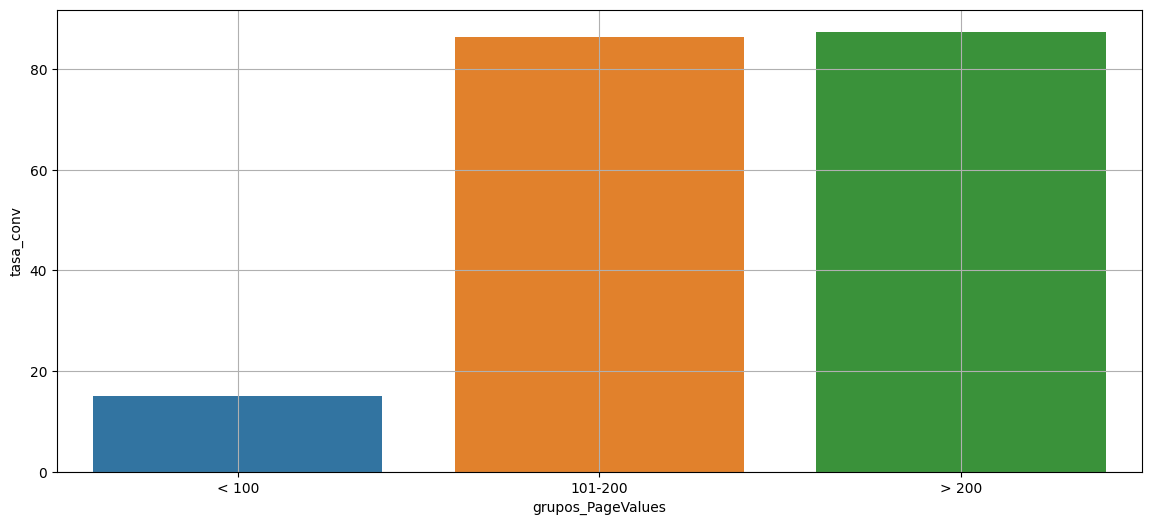

In [43]:
graficar_tasas_conversion('grupos_PageValues', 'Revenue', type='bar', order=['< 100','101-200','> 200'])


Se sigue confirmando la relación de esta variable con la decisión de compra final, para los grupos mayores a 100 un 85% de las veces se termina comprando.

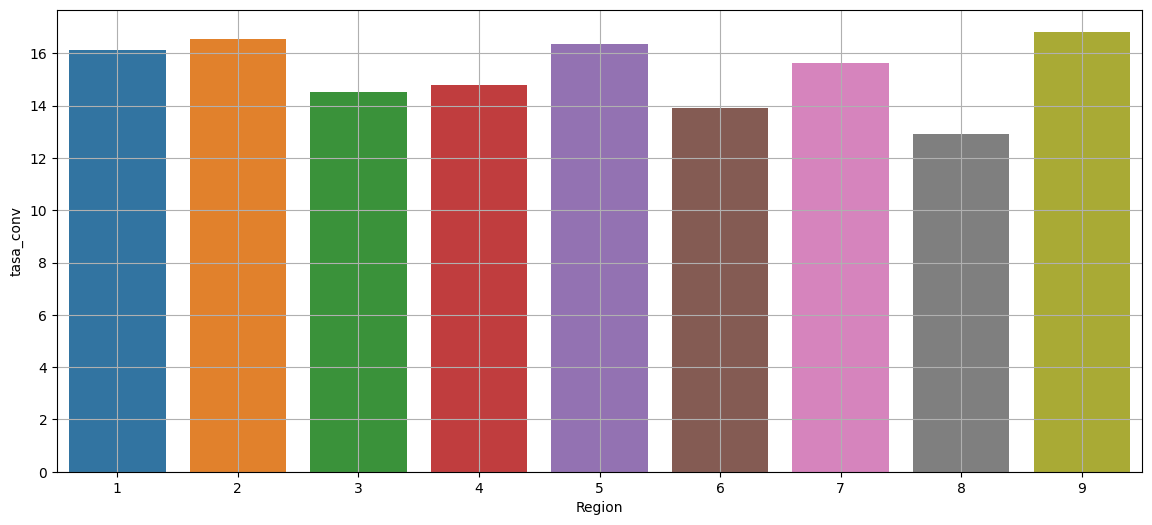

In [44]:
graficar_tasas_conversion('Region', 'Revenue', type='bar')

No se observa diferencia por Region

In [45]:
browser_count = df1.groupby('Browser', as_index=False)['Revenue'].count()
browser_count

,Browser,Revenue
0,1,2462
1,2,7961
2,3,105
3,4,736
4,5,467
5,6,174
6,7,49
7,8,135
8,9,1
9,10,163


Text(0.5, 1.0, 'Browsers')

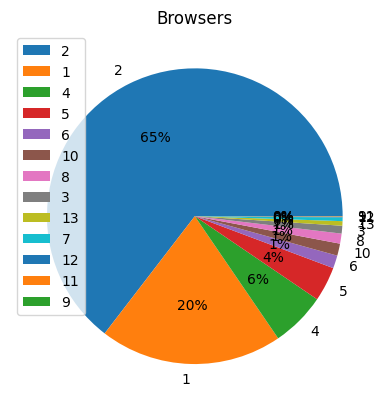

In [46]:
browser = df1['Browser'].value_counts()
plt.pie(browser, labels= browser.index, autopct='%.0f%%')
plt.legend(loc= 'upper left')
plt.title('Browsers')

In [47]:
browser

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

Los navegadores más utilizados son el 2, el 1 y el 4. Entre esos 3 navegadores se realizan el 90% de las visitas a la página.

### Variable PRODUCT RELATED DURATION

### Se considera la variable Product Duration como importante ya que el tiempo que las personas dedican a una página se entiende se relaciona en forma directa con el interés de esa persona en el producto.

<Axes: xlabel='Revenue', ylabel='ProductRelated_Duration_tope'>

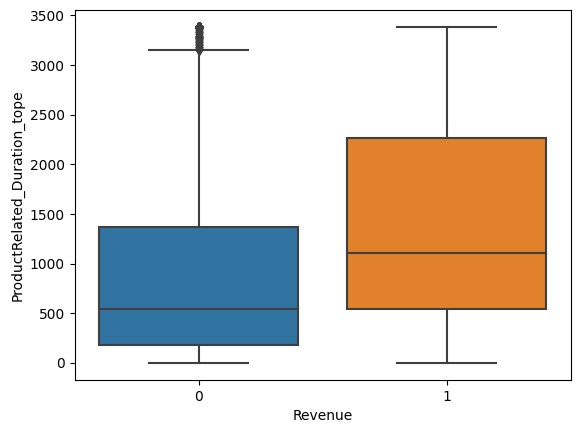

In [48]:
sns.boxplot(x="Revenue", y="ProductRelated_Duration_tope", data=df_num)

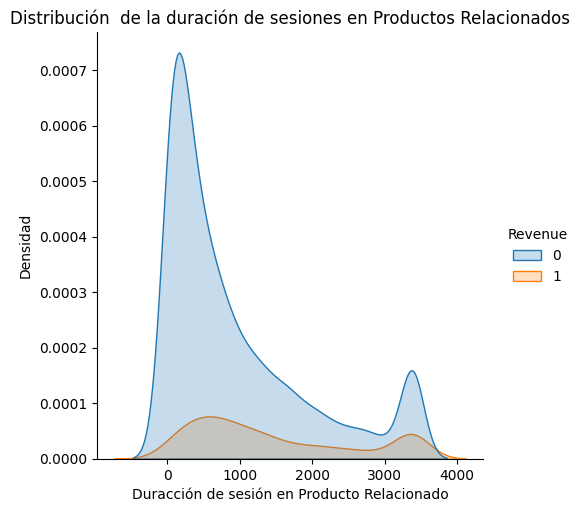

In [49]:
ax = sns.displot(data=df_num, x='ProductRelated_Duration_tope', kind='kde', hue='Revenue', fill=True)
ax.set(xlabel='Duracción de sesión en Producto Relacionado', ylabel='Densidad', title='Distribución  de la duración de sesiones en Productos Relacionados')

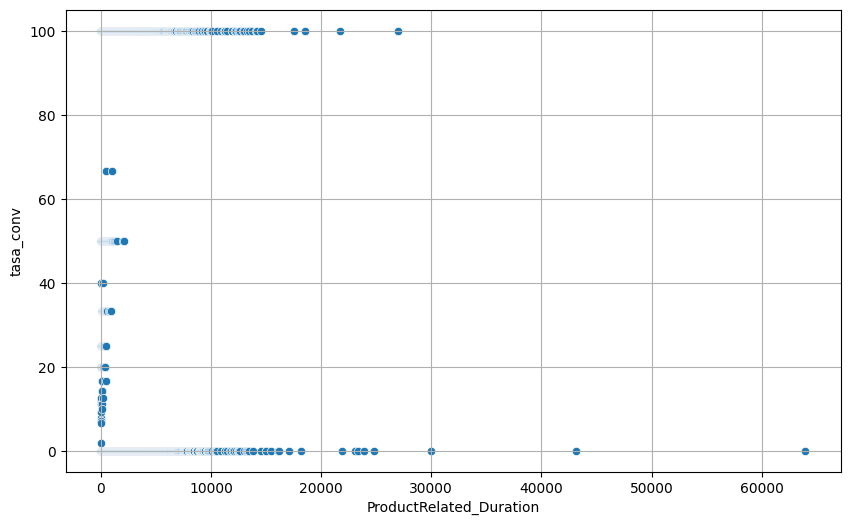

In [50]:
graficar_tasas_conversion('ProductRelated_Duration', 'Revenue', type='scatter')

In [51]:
df1.loc[:,'grupos_ProductRelated_Duration']="<5000"
df1.loc[df1['ProductRelated_Duration']>5000, 'grupos_ProductRelated_Duration']="5001-10000"
df1.loc[df1['ProductRelated_Duration']>10000, 'grupos_ProductRelated_Duration']="10001-15000"
df1.loc[df1['ProductRelated_Duration']>15000, 'grupos_ProductRelated_Duration']=">15000"

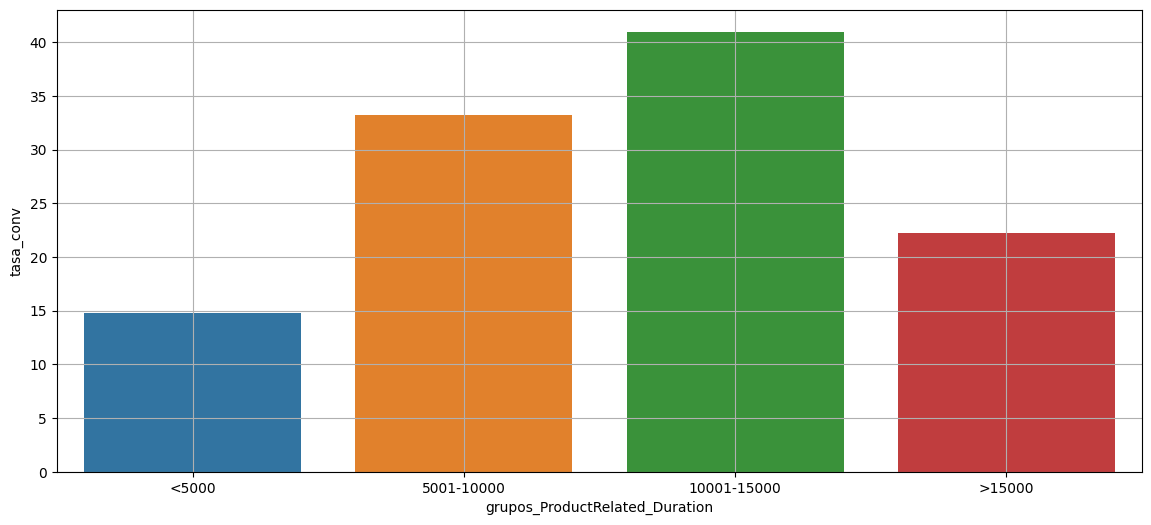

In [52]:
graficar_tasas_conversion('grupos_ProductRelated_Duration', 'Revenue', type='bar', order=['<5000','5001-10000','10001-15000','>15000'])

### Hipótesis 1
Se observa una tendencia a que la venta se concrete cuando la duración de la sesión en un producto relacionado es mayor, lo cual hace sentido considerando que la gente suele dedicar mayor tiempo a las cosas sobre las que tiene interés. Observando el gráfico de tasa de conversión también se destaca que cuando supera determinado tiempo la decisión de compra disminuye.

### 2) Variable EXIT RATES

<Axes: xlabel='Revenue', ylabel='ExitRates'>

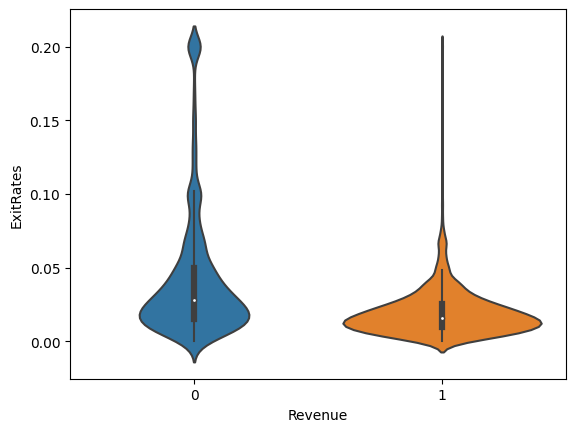

In [53]:
 sns.violinplot(x='Revenue', y='ExitRates', data=df_num)

<Axes: xlabel='ExitRates', ylabel='Count'>

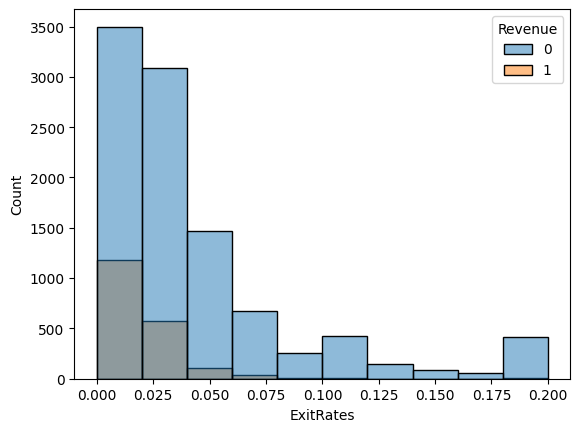

In [54]:
sns.histplot(data=df_num, x="ExitRates", hue= 'Revenue', bins= 10)

### Hipótesis 2
A mayor ExitRate no se observa una diferencia en la decisión de compra, sin embargo podemos concluir que las compras se realizan cuando el ExitRate es bajo.

### 3) Variable PAGE VALUES

<Axes: xlabel='Revenue', ylabel='PageValues'>

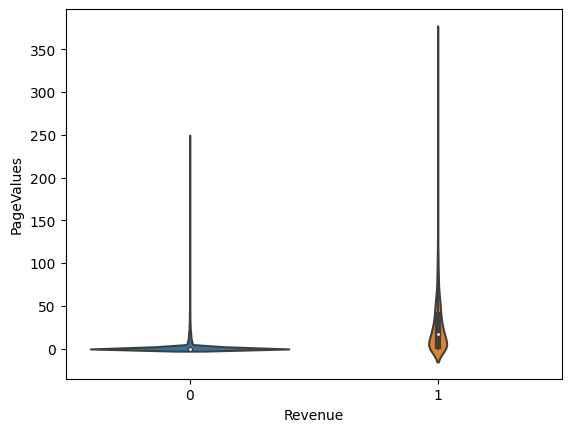

In [55]:
 sns.violinplot(x='Revenue', y='PageValues', data=df_num)

<Axes: xlabel='PageValues', ylabel='Count'>

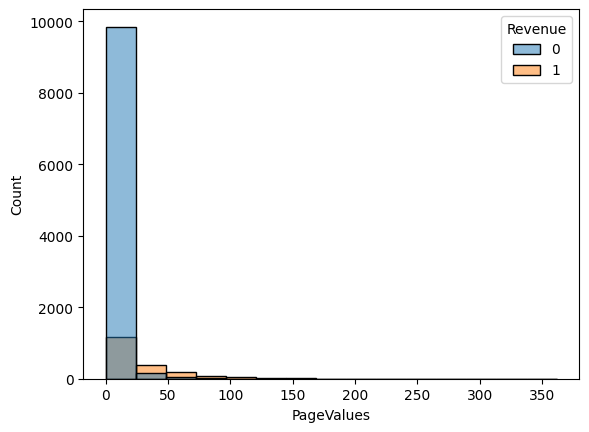

In [56]:
sns.histplot(data=df_num, x="PageValues", hue= 'Revenue')

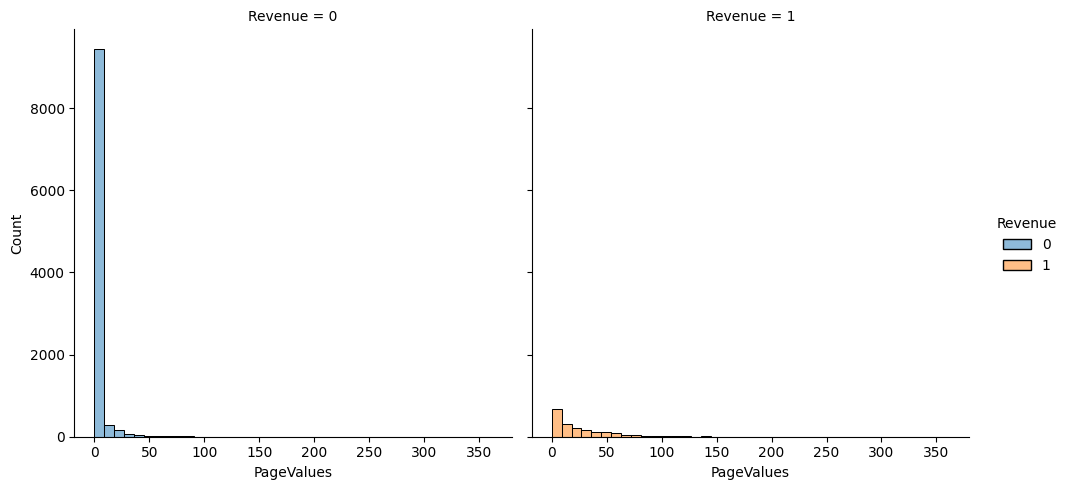

In [57]:
sns.displot(data=df_num, x="PageValues", hue="Revenue", col="Revenue", bins=40)

<Axes: xlabel='Revenue', ylabel='PageValues'>

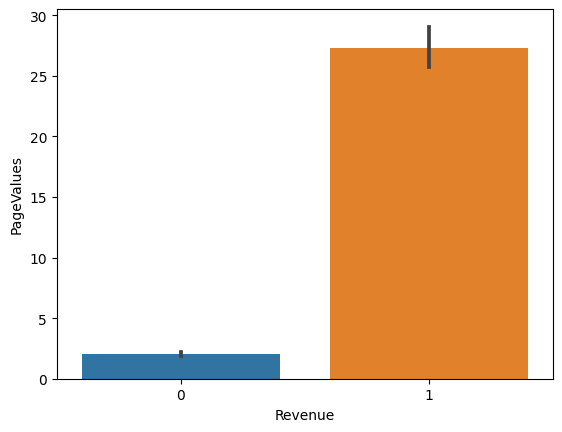

In [58]:
sns.barplot(x="Revenue", y="PageValues", data=df_num)

### Hipótesis 3
Se observa mayor intención de compra cuando el PageValue es mayor a cero

### 4) Variable SPECIAL DAY y WEEKEND

<Axes: xlabel='SpecialDay', ylabel='count'>

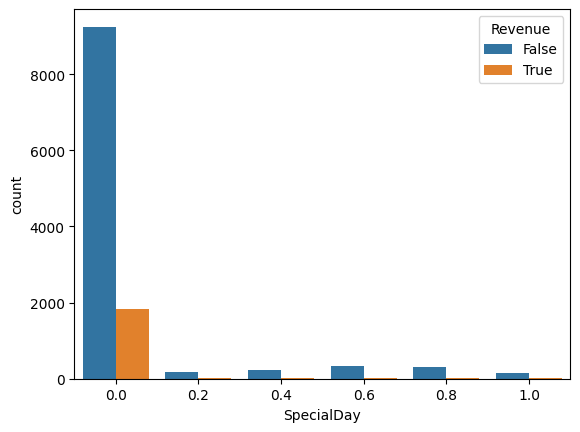

In [59]:
sns.countplot(x='SpecialDay', data = df1, hue = 'Revenue')

<Axes: xlabel='Weekend', ylabel='count'>

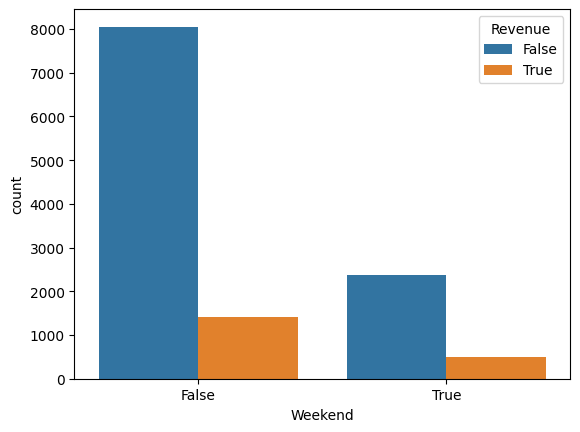

In [60]:
sns.countplot(x='Weekend', data = df1, hue = 'Revenue')

### Hipótesis 4
No se observa diferencia en la intención de compra cerca de los fines de semana o días especiales

### 5) Variable MONTH

<Axes: xlabel='Month', ylabel='Count'>

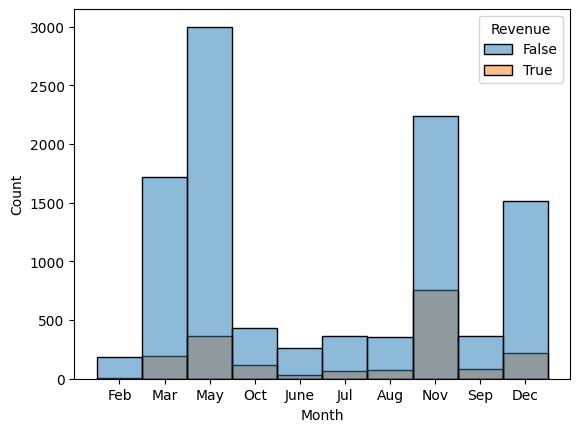

In [61]:
sns.histplot(data=df1, x="Month", hue="Revenue")

### Hipótesis 5
Se observa estacionalidad con una clara mayor intención de compra en el mes de Noviembre.

### 6) Variable VISITOR TYPE

<Axes: xlabel='VisitorType', ylabel='Count'>

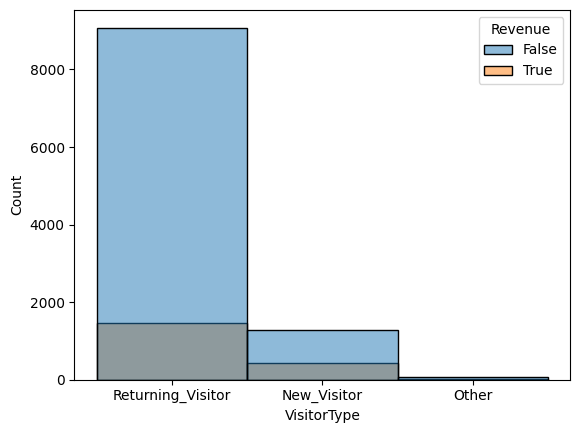

In [62]:
sns.histplot(data=df1, x="VisitorType", hue="Revenue")

### Hipótesis 6
La mayoría de las compras las realizan quienes vuelven a visitar la página, sin embargo también la mayoría de quienes visitan la página son Returning Visitors, el porcentaje de gente que termina comprando no es alto, recordemos que la tasa de compra final era mayor en visitantes nuevos.  Se recomienda realizar campañas para incrementar visitantes nuevos.

# Análisis Bivariado sobre variable a predecir

### Se tomaron las siguientes combinaciones de variables que se consideran relevantes y se analiza su correlación.

### **Tasa de conversión para 2 variables**

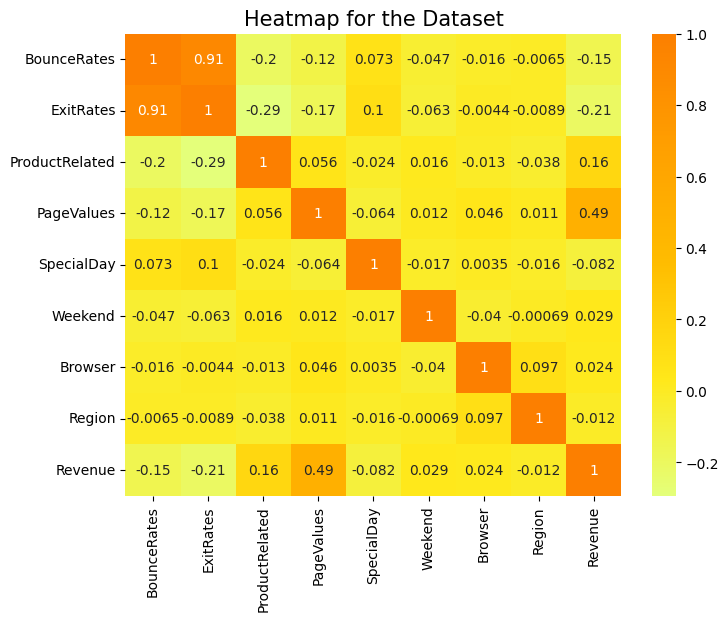

In [63]:
plt.rcParams['figure.figsize'] = (8, 6)

sns.heatmap(df1[['BounceRates','ExitRates','ProductRelated','PageValues','SpecialDay','Weekend','Browser','Region','Revenue']].corr(),
            annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 15)
plt.show()

In [64]:
def graficar_tc_bivariada(col_list, orden=None):
    tc = df1.groupby(col_list)['Revenue'].mean().to_frame().reset_index()

    plt.figure(figsize=(13,7))
    ax = sns.pointplot(x=tc['Revenue'], y= tc[col_list[0]], hue= tc[col_list[1]], join=False)
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)
    plt.title(f'Tasa de conversion para {col_list[0]} y {col_list[1]}')
    plt.xlabel('Tasa de conversion (%)')
    plt.xlim((0,1));

Se analizarán las siguientes combinaciones de variables:
* Month y Weekend
* PageValues y Region
* Region y ProductRelated

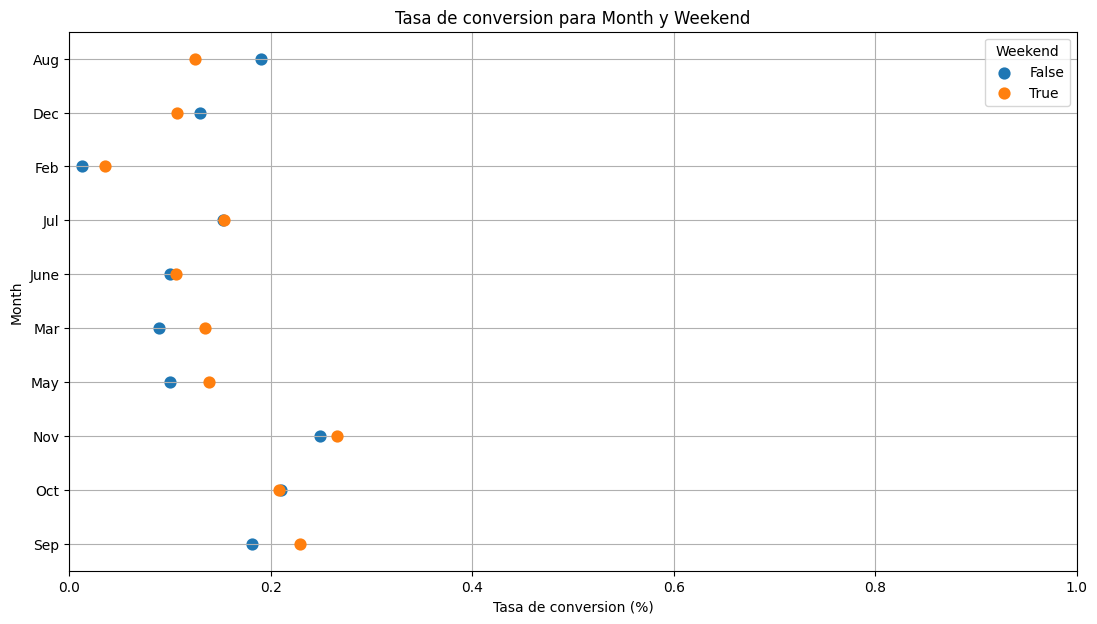

In [65]:
graficar_tc_bivariada(['Month','Weekend'])

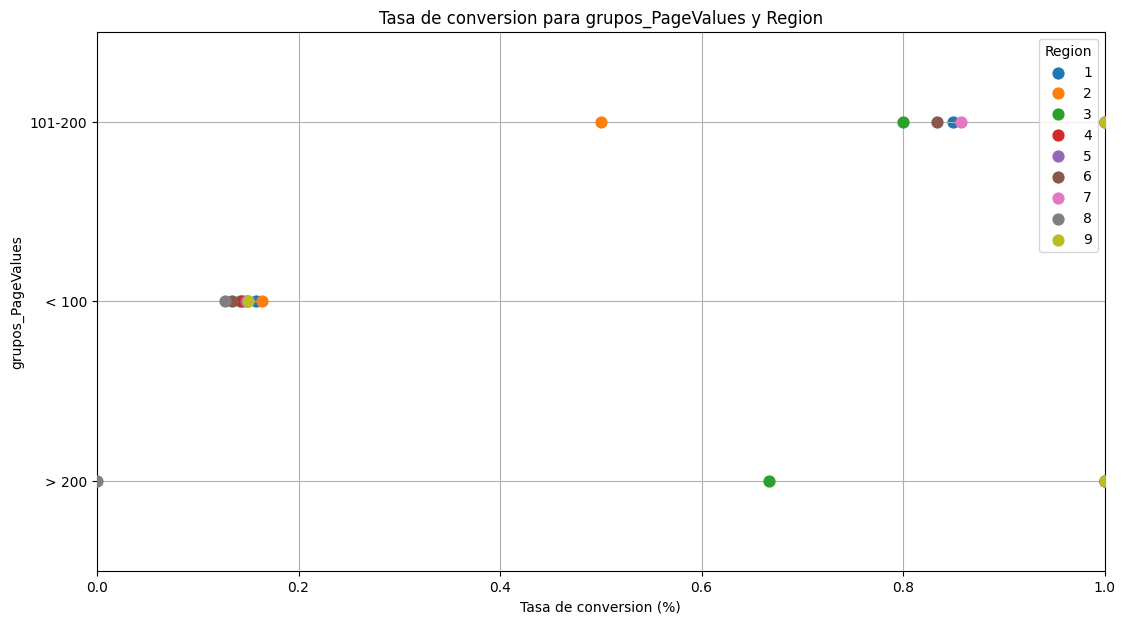

In [66]:
graficar_tc_bivariada(['grupos_PageValues','Region'])

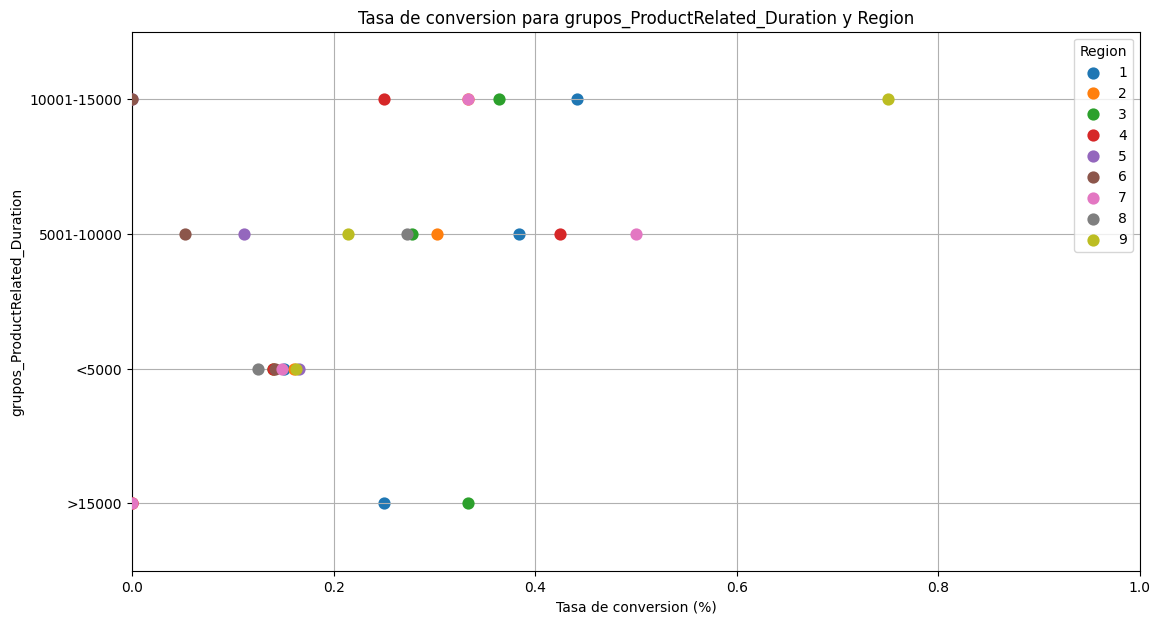

In [67]:
graficar_tc_bivariada(['grupos_ProductRelated_Duration','Region'])

In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Administrative                  12330 non-null  int64  
 1   Administrative_Duration         12330 non-null  float64
 2   Informational                   12330 non-null  int64  
 3   Informational_Duration          12330 non-null  float64
 4   ProductRelated                  12330 non-null  int64  
 5   ProductRelated_Duration         12330 non-null  float64
 6   BounceRates                     12330 non-null  float64
 7   ExitRates                       12330 non-null  float64
 8   PageValues                      12330 non-null  float64
 9   SpecialDay                      12330 non-null  float64
 10  Month                           12330 non-null  object 
 11  OperatingSystems                12330 non-null  int64  
 12  Browser                         

# Label Encoder  # No se procede con este método ya que asigna mal el órden de los meses.

In [69]:
df1[['Month']].value_counts()

Month
May      3364
Nov      2998
Mar      1907
Dec      1727
Oct       549
Sep       448
Aug       433
Jul       432
June      288
Feb       184
dtype: int64

In [70]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder() #instanciar el objeto
# df1["Month"] = encoder.fit_transform(df1["Month"])

In [71]:
# df1['Month'].value_counts()

In [72]:
df_month = pd.get_dummies(df1['Month'])

In [73]:
df_month.head()

,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [74]:
dfmonth  = df1.join(df_month, how= 'left') #se junta por medio del indice

In [75]:
dfmonth.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'grupos_ProductRelated', 'grupos_PageValues',
       'grupos_ProductRelated_Duration', 'Aug', 'Dec', 'Feb', 'Jul', 'June',
       'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

# Get Dummies sobre VisitorType, grupos_ProductRelated, grupos_PageValues

In [76]:
dfmonth['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [77]:
df_visitor = pd.get_dummies(dfmonth['VisitorType'])

In [78]:
df_visitor.head()

,New_Visitor,Other,Returning_Visitor
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [79]:
pd.get_dummies(dfmonth['VisitorType'])

,New_Visitor,Other,Returning_Visitor
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
12325,0,0,1
12326,0,0,1
12327,0,0,1
12328,0,0,1


In [80]:
df2  = dfmonth.join(df_visitor, how= 'left') #se junta por medio del indice

In [81]:
df2.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'grupos_ProductRelated', 'grupos_PageValues',
       'grupos_ProductRelated_Duration', 'Aug', 'Dec', 'Feb', 'Jul', 'June',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'New_Visitor', 'Other',
       'Returning_Visitor'],
      dtype='object')

In [82]:
df1['grupos_ProductRelated'].value_counts()

0-150      12024
151-300      252
301-450       45
451-600        7
601-750        2
Name: grupos_ProductRelated, dtype: int64

In [83]:
df_group1 = pd.get_dummies(df1['grupos_ProductRelated'])

In [84]:
pd.get_dummies(df1['grupos_ProductRelated'])

,0-150,151-300,301-450,451-600,601-750
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
12325,1,0,0,0,0
12326,1,0,0,0,0
12327,1,0,0,0,0
12328,1,0,0,0,0


In [85]:
df3  = df2.join(df_group1, how= 'left') #se junta por medio del indice

In [86]:
df1['grupos_PageValues'].value_counts()

< 100      12248
101-200       66
> 200         16
Name: grupos_PageValues, dtype: int64

In [87]:
df_group2 = pd.get_dummies(df1['grupos_PageValues'])

In [88]:
pd.get_dummies(df1['grupos_PageValues'])

,101-200,< 100,> 200
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
12325,0,1,0
12326,0,1,0
12327,0,1,0
12328,0,1,0


In [89]:
df4  = df3.join(df_group2, how= 'left') #se junta por medio del indice

In [90]:
df4.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'grupos_ProductRelated', 'grupos_PageValues',
       'grupos_ProductRelated_Duration', 'Aug', 'Dec', 'Feb', 'Jul', 'June',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'New_Visitor', 'Other',
       'Returning_Visitor', '0-150', '151-300', '301-450', '451-600',
       '601-750', '101-200', '< 100', '> 200'],
      dtype='object')

# Fase de Modelado

### Train & Test Split

In [91]:
# split del dataset
from sklearn.model_selection import train_test_split

### Elijo variables numéricas a utilizar

### Transformo variable objetivo a numérica


In [92]:
 # Selección de variables numéricas
 df_num1 = df4.select_dtypes('number')
 df_num1['y'] = df4['Revenue']

In [93]:
# saco las variables consideradas no relevantes
df_num1 = df_num1.drop(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'OperatingSystems', 'Browser',
       'Region'], axis=1)

In [94]:
df_num1.columns

Index(['ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'TrafficType', 'Aug', 'Dec', 'Feb', 'Jul',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'New_Visitor', 'Other',
       'Returning_Visitor', '0-150', '151-300', '301-450', '451-600',
       '601-750', '101-200', '< 100', '> 200', 'y'],
      dtype='object')

In [95]:
# separamos las caracteristicas/features del target
X = df_num1.drop('y', axis=1) #variables que utilizara para encontrar el patron por el cual un algoritmo encuentra esos factores por el
# una persona compra un producto financiero o NO.
y = df_num1['y'] #variables objetivo

In [96]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)


print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)

Tamaño del set de entrenamiento: (9864, 28)
Tamaño del set de testeo: (2466, 28)


# Regresion Logística

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X1 = scaler.transform(X)
X1 = pd.DataFrame(data = X1, columns= X.columns)


In [98]:
X1 # (obv - promedio)/ desviacion estandar

,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,TrafficType,Aug,Dec,Feb,...,Other,Returning_Visitor,0-150,151-300,301-450,451-600,601-750,101-200,< 100,> 200
0,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-0.762629,-0.190777,-0.403582,8.124707,...,-0.083316,0.410621,0.159528,-0.144445,-0.060523,-0.023834,-0.012737,-0.073359,0.081823,-0.036046
1,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-0.514182,-0.190777,-0.403582,8.124707,...,-0.083316,0.410621,0.159528,-0.144445,-0.060523,-0.023834,-0.012737,-0.073359,0.081823,-0.036046
2,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-0.265735,-0.190777,-0.403582,8.124707,...,-0.083316,0.410621,0.159528,-0.144445,-0.060523,-0.023834,-0.012737,-0.073359,0.081823,-0.036046
3,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-0.017289,-0.190777,-0.403582,8.124707,...,-0.083316,0.410621,0.159528,-0.144445,-0.060523,-0.023834,-0.012737,-0.073359,0.081823,-0.036046
4,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-0.017289,-0.190777,-0.403582,8.124707,...,-0.083316,0.410621,0.159528,-0.144445,-0.060523,-0.023834,-0.012737,-0.073359,0.081823,-0.036046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,-0.762629,-0.190777,2.477811,-0.123081,...,-0.083316,0.410621,0.159528,-0.144445,-0.060523,-0.023834,-0.012737,-0.073359,0.081823,-0.036046
12326,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,0.976499,-0.190777,-0.403582,-0.123081,...,-0.083316,0.410621,0.159528,-0.144445,-0.060523,-0.023834,-0.012737,-0.073359,0.081823,-0.036046
12327,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,2.218733,-0.190777,-0.403582,-0.123081,...,-0.083316,0.410621,0.159528,-0.144445,-0.060523,-0.023834,-0.012737,-0.073359,0.081823,-0.036046
12328,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,1.721839,-0.190777,-0.403582,-0.123081,...,-0.083316,0.410621,0.159528,-0.144445,-0.060523,-0.023834,-0.012737,-0.073359,0.081823,-0.036046


In [99]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train) # 1 Paso y 2# Se hace al mismo tiempo

In [100]:
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [101]:
from sklearn.metrics import accuracy_score
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8852392538523925


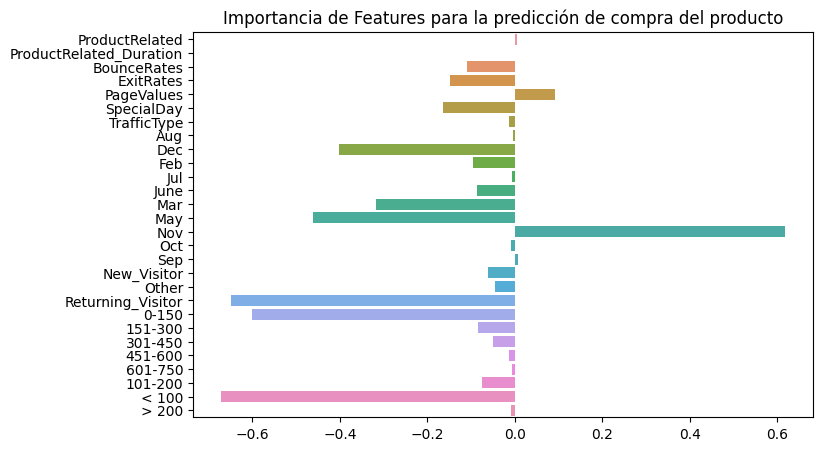

In [102]:
plt.figure(figsize=(8,5))

values = pd.Series(clf.coef_.flat)

sns.barplot(y=X.columns,
            x=values,
           ).set(title='Importancia de Features para la predicción de compra del producto')

plt.show()

In [103]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_score1 = clf.predict_proba(X_test)[:,1]
y_score1

array([0.06287897, 0.03352689, 0.05330996, ..., 0.05711076, 0.0682044 ,
       0.05074968])

In [104]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

In [105]:
print('ROC CURVE Logistic Regression: \n', roc_auc_score(y_test, y_score1))

ROC CURVE Logistic Regression: 
 0.8891730562450384


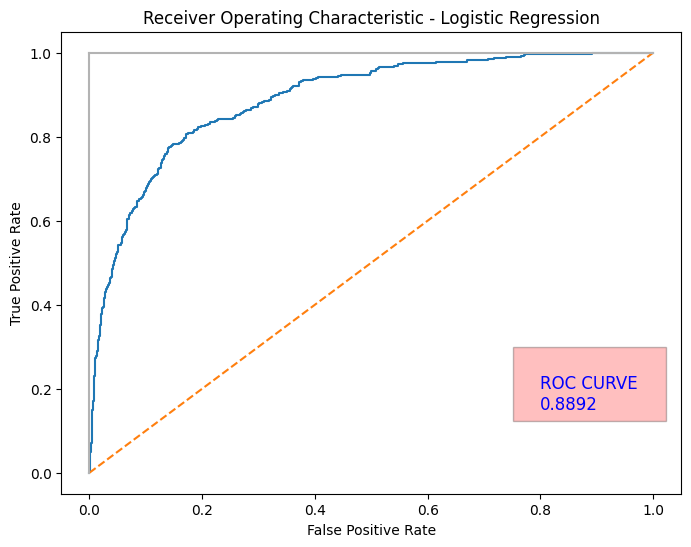

In [106]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.text(0.8,0.2,r'ROC CURVE', fontsize=12, color='blue', bbox={'facecolor':'red', 'pad':20, 'alpha':0.25})
plt.text(0.8,0.15,round(roc_auc_score(y_test, y_score1),4), fontsize=12, color='blue')
plt.show()

# Modelling utilizando todas las variables

### Árbol de decisión

In [107]:
df4  = df3.join(df_group2, how= 'left') #se junta por medio del indice

In [108]:
df4.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'grupos_ProductRelated', 'grupos_PageValues',
       'grupos_ProductRelated_Duration', 'Aug', 'Dec', 'Feb', 'Jul', 'June',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'New_Visitor', 'Other',
       'Returning_Visitor', '0-150', '151-300', '301-450', '451-600',
       '601-750', '101-200', '< 100', '> 200'],
      dtype='object')

In [109]:
df4 = df4.drop(['grupos_ProductRelated', 'grupos_PageValues',
       'grupos_ProductRelated_Duration','VisitorType', 'Month'], axis = 1)

In [110]:
#Separación en Train y Test
X = df4.drop("Revenue", axis=1)
y = df4.Revenue

In [111]:
from sklearn.model_selection import train_test_split
#Train y Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [112]:
#Arbol de Decision
from sklearn.tree import DecisionTreeClassifier
arbol_de_decision = DecisionTreeClassifier(max_depth=4, random_state=42)

In [113]:
#Fit
arbol_de_decision.fit(X_train,y_train) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=4, random_state=42)

In [114]:
#Prediccion
y_test_pred = arbol_de_decision.predict(X_test)

### Accuracy

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.8972695323060287

### Utilizo toddas las variables y el modelo mejora muy poco su Accuracy


### Matriz de Confusión

In [116]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[3037,   87],
       [ 293,  282]])

<Axes: >

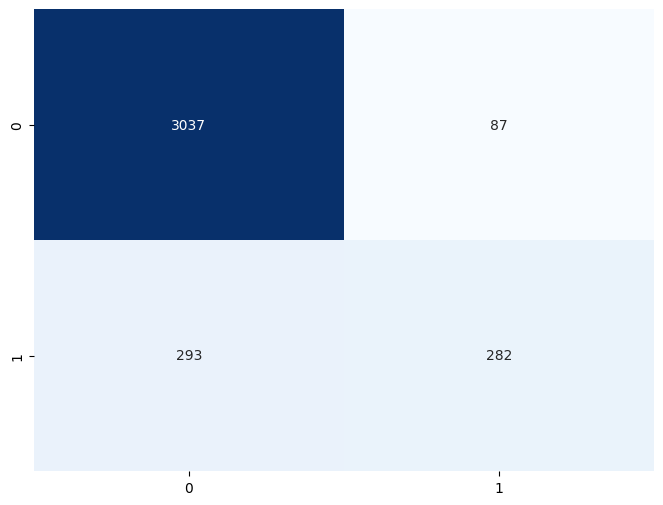

In [117]:
matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap='Blues', fmt='g', cbar=None)

### Precision

In [118]:
from sklearn.metrics import precision_score
precision_score(y_test, y_test_pred)

0.7642276422764228

### Recall

In [119]:
from sklearn.metrics import recall_score
recall_score(y_test, y_test_pred)

0.49043478260869566

### F1 Score

In [120]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred)

0.5974576271186441

### Classification Report

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

       False       0.91      0.97      0.94      3124
        True       0.76      0.49      0.60       575

    accuracy                           0.90      3699
   macro avg       0.84      0.73      0.77      3699
weighted avg       0.89      0.90      0.89      3699



### Curva ROC

In [122]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_score1 = arbol_de_decision.predict_proba(X_test)[:,1]
y_score1

array([0.06158358, 0.25119617, 0.72254335, ..., 0.01379031, 0.87130802,
       0.01379031])

In [123]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

In [124]:
  print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

roc_auc_score for DecisionTree:  0.9120667483159828


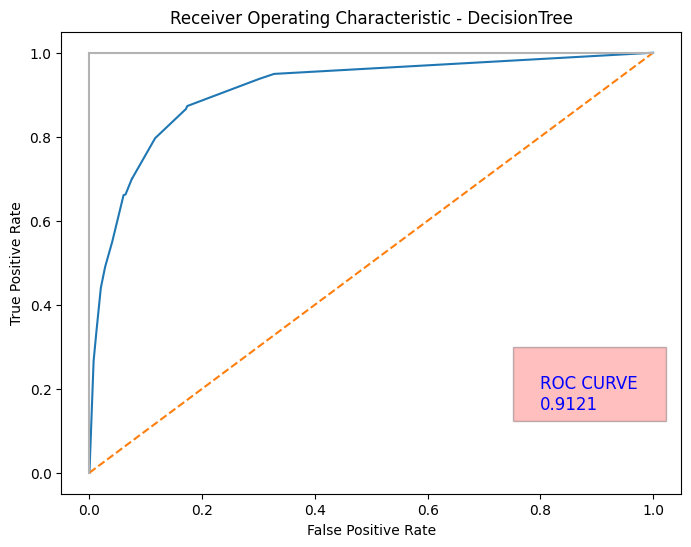

In [125]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.text(0.8,0.2,r'ROC CURVE', fontsize=12, color='blue', bbox={'facecolor':'red', 'pad':20, 'alpha':0.25})
plt.text(0.8,0.15,round(roc_auc_score(y_test, y_score1),4), fontsize=12, color='blue')
plt.show()

# PCA

In [126]:
df_num1.columns

Index(['ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'TrafficType', 'Aug', 'Dec', 'Feb', 'Jul',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'New_Visitor', 'Other',
       'Returning_Visitor', '0-150', '151-300', '301-450', '451-600',
       '601-750', '101-200', '< 100', '> 200', 'y'],
      dtype='object')

In [127]:
df_num1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProductRelated           12330 non-null  int64  
 1   ProductRelated_Duration  12330 non-null  float64
 2   BounceRates              12330 non-null  float64
 3   ExitRates                12330 non-null  float64
 4   PageValues               12330 non-null  float64
 5   SpecialDay               12330 non-null  float64
 6   TrafficType              12330 non-null  int64  
 7   Aug                      12330 non-null  uint8  
 8   Dec                      12330 non-null  uint8  
 9   Feb                      12330 non-null  uint8  
 10  Jul                      12330 non-null  uint8  
 11  June                     12330 non-null  uint8  
 12  Mar                      12330 non-null  uint8  
 13  May                      12330 non-null  uint8  
 14  Nov                   

In [128]:
### Tranformacion variable Target a numerica
df_num1.y = df_num1.y.replace({True: 1, False: 0})

In [129]:
df_num1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProductRelated           12330 non-null  int64  
 1   ProductRelated_Duration  12330 non-null  float64
 2   BounceRates              12330 non-null  float64
 3   ExitRates                12330 non-null  float64
 4   PageValues               12330 non-null  float64
 5   SpecialDay               12330 non-null  float64
 6   TrafficType              12330 non-null  int64  
 7   Aug                      12330 non-null  uint8  
 8   Dec                      12330 non-null  uint8  
 9   Feb                      12330 non-null  uint8  
 10  Jul                      12330 non-null  uint8  
 11  June                     12330 non-null  uint8  
 12  Mar                      12330 non-null  uint8  
 13  May                      12330 non-null  uint8  
 14  Nov                   

In [130]:
# separamos columna target
X = df_num1.drop('y', axis=1)
y = df_num1['y']

In [131]:
### Separamos el conjunto de datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [132]:
### Estandarizacion de las variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [133]:
X_train

array([[-0.35288409, -0.34004456, -0.45729774, ..., -0.07488054,
         0.08207356, -0.03341274],
       [ 1.83112889,  1.17480757, -0.38319113, ..., -0.07488054,
         0.08207356, -0.03341274],
       [ 4.77286066,  4.10865939, -0.3250858 , ..., -0.07488054,
         0.08207356, -0.03341274],
       ...,
       [ 3.7922834 ,  3.59190965, -0.41810634, ..., -0.07488054,
         0.08207356, -0.03341274],
       [-0.19688317, -0.44052583, -0.45729774, ..., -0.07488054,
         0.08207356, -0.03341274],
       [ 0.24883377,  0.27580837, -0.32665977, ..., -0.07488054,
         0.08207356, -0.03341274]])

In [134]:
X_test

array([[ 0.93969502,  0.97755019, -0.26266481, ..., -0.07488054,
         0.08207356, -0.03341274],
       [ 1.80884304,  3.50178876, -0.29400026, ..., -0.07488054,
         0.08207356, -0.03341274],
       [ 0.91740917,  0.20828202, -0.24546577, ..., -0.07488054,
         0.08207356, -0.03341274],
       ...,
       [-0.17459732,  0.12743217, -0.45729774, ..., -0.07488054,
         0.08207356, -0.03341274],
       [ 2.20998828,  1.38353235, -0.27440457, ..., -0.07488054,
         0.08207356, -0.03341274],
       [ 0.7391224 ,  0.86072365, -0.45729774, ..., -0.07488054,
         0.08207356, -0.03341274]])

In [135]:
### Aplicacion PCA con 4 variables
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [136]:
X_train

array([[-0.41468777, -0.36855548,  0.30303421, -1.48349045],
       [ 1.47295461, -0.15130151, -0.33233979,  0.19362113],
       [ 9.84974657, -1.49003052,  0.41515776,  1.40773729],
       ...,
       [ 9.39155576, -1.45371012,  0.57851286,  1.8613064 ],
       [ 0.08119831, -0.03206582, -0.33670851,  0.14311483],
       [ 0.07845836, -0.53895717,  0.45046435, -1.32537833]])

In [137]:
# Explicación de la varianza de las componentes
explained_variance = pca.explained_variance_ratio_
explained_variance



array([0.12496695, 0.0972149 , 0.07870425, 0.0593463 ])


El primer componente es responsable de la varianza del 12,49% y el segundo del 9,71% y el tercero del 7,8% y el cuarto 5,92%. Entonces el 35,92% de la informacion está contenida en los primeros 4 componentes.

In [138]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
model_rf.fit(X_train, y_train)

# Predicción
y_pred = model_rf.predict(X_test)

In [139]:
#Evaluación básica del modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)

El accuracy del modelo es: 0.8527980535279805


In [140]:
model_rf.feature_importances_

array([0.26859147, 0.6279116 , 0.10178975, 0.00170719])

# **Conclusion PCA**:

Para obtener un buen modelo utilizando PCA necesitamos de 3 componentes. DE todos modos se aprecia que el PCA no resulta un método efectivo para el set de datos ya que empeora el poder predictivo. El problema  probablemente sea generado debido a que algunas variables no son continuas, lo cual afecta negativamente al uso de PCA.


# KNN

In [141]:
df4  = df3.join(df_group2, how= 'left') #se junta por medio del indice

In [142]:
df4 = df4.drop(['grupos_ProductRelated', 'grupos_PageValues',
       'grupos_ProductRelated_Duration','VisitorType', 'Month'], axis = 1)

In [143]:
#Separación en Train y Test
X = df4.drop("Revenue", axis=1)
y = df4.Revenue

In [144]:
#Train y Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [145]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3) #instanciar el objeto como primer paso
neigh.fit(X_train, y_train) #Paso2: Ajustar con los datos

KNeighborsClassifier(n_neighbors=3)

In [146]:
y_pred = neigh.predict(X_test) #Prediccion con datos
y_pred_train = neigh.predict(X_train) #Prediccion con datos de entrenamiento

In [147]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy: 0.9142625419997683


In [148]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8464449851311165


In [149]:
y_test_pred = neigh.predict(X_test)

In [150]:
from sklearn.metrics import recall_score
recall_score(y_test, y_test_pred)

0.30434782608695654

In [151]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

       False       0.88      0.95      0.91      3124
        True       0.51      0.30      0.38       575

    accuracy                           0.85      3699
   macro avg       0.70      0.63      0.65      3699
weighted avg       0.82      0.85      0.83      3699



### Método del codo

In [152]:
# normalizar data
X = X.values
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [153]:
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples,calinski_harabasz_score
from sklearn.cluster import KMeans
# diccionarios vacios para ser almacenados los resultados
sse,db,slc,cal = {}, {}, {}, {}
for k in range(2, 10):
    # semilla de 10 para asegurar reproducibilidad
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X) # Algoritmo K means
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_ # Extraccion de labels
    sse[k] = kmeans.inertia_ # Inercia: Suma de las distancias de las muestras a su centroide mas cercano
    db[k] = davies_bouldin_score(X,clusters) # Calculo del indice de Davies Bouldin
    slc[k] = silhouette_score(X,clusters) # Calculo del indice de Silhouette
    cal[k] = calinski_harabasz_score(X,clusters) # Calculo del indice de Calinski-Harabasz

### Método del codo

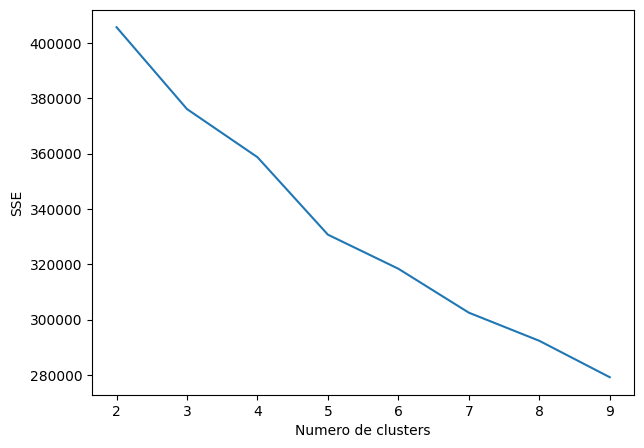

In [154]:
plt.figure(figsize=(7,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Numero de clusters")
plt.ylabel("SSE")
plt.show()

### Davies Bouldin

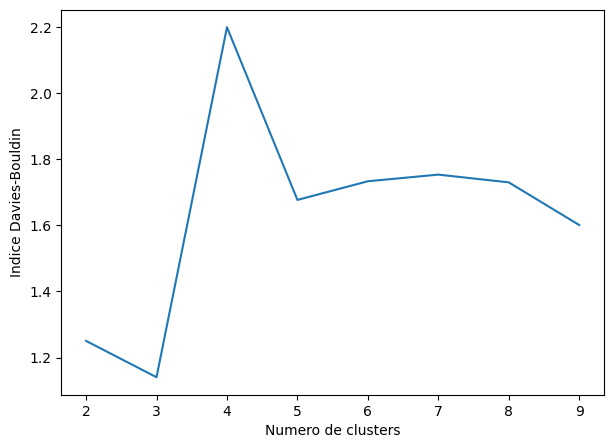

In [155]:
plt.figure(figsize=(7,5))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Numero de clusters")
plt.ylabel("Indice Davies-Bouldin")
plt.show()

### Silhouette

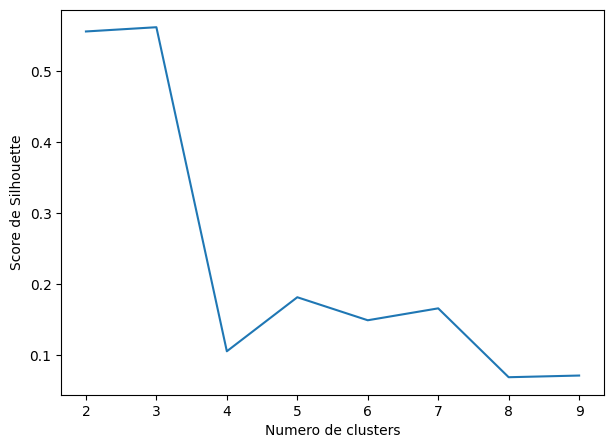

In [156]:
plt.figure(figsize=(7,5))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Numero de clusters")
plt.ylabel("Score de Silhouette")
plt.show()

# SVM

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),train_size= 0.7,random_state = 42,shuffle=True)

In [163]:
from sklearn.svm import SVC
# Creación del modelo SVM
modelo = SVC(C = 10, kernel = 'linear', random_state=42, probability=True)
modelo.fit(X_train, y_train)

SVC(C=10, kernel='linear', probability=True, random_state=42)

In [164]:
y_test_pred = modelo.predict(X_test)
reporte=classification_report(y_test,y_test_pred)
print(reporte)

              precision    recall  f1-score   support

       False       0.90      0.97      0.93      3124
        True       0.73      0.40      0.51       575

    accuracy                           0.88      3699
   macro avg       0.81      0.68      0.72      3699
weighted avg       0.87      0.88      0.87      3699



In [165]:
y_score2 = modelo.predict_proba(X_test)[:,1]
y_score2

array([0.0897532 , 0.09587021, 0.12342714, ..., 0.07460973, 0.92805703,
       0.07251195])

In [166]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score2)

In [167]:
  print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_score2))

roc_auc_score for SVM:  0.8817488726827367


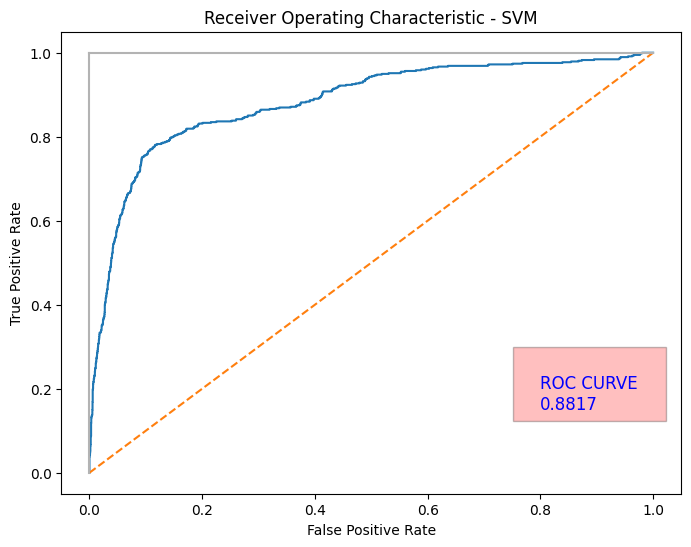

In [168]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.text(0.8,0.2,r'ROC CURVE', fontsize=12, color='blue', bbox={'facecolor':'red', 'pad':20, 'alpha':0.25})
plt.text(0.8,0.15,round(roc_auc_score(y_test, y_score2),4), fontsize=12, color='blue')
plt.show()

# XGBoost Model

In [169]:
# separamos columna target
X = df_num1.drop('y', axis=1)
y = df_num1['y']

In [170]:
X.columns

Index(['ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'TrafficType', 'Aug', 'Dec', 'Feb', 'Jul',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'New_Visitor', 'Other',
       'Returning_Visitor', '0-150', '151-300', '301-450', '451-600',
       '601-750', '101-200', '< 100', '> 200'],
      dtype='object')

In [171]:
# Modifico nombre de columna porque Xgoost no puede tener [] o <> en el nombre de las columnas
X.rename(columns = {'< 100':'menor 100'}, inplace = True)
X.rename(columns = {'> 200':'mayor 200'}, inplace = True)
X.columns

Index(['ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'TrafficType', 'Aug', 'Dec', 'Feb', 'Jul',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'New_Visitor', 'Other',
       'Returning_Visitor', '0-150', '151-300', '301-450', '451-600',
       '601-750', '101-200', 'menor 100', 'mayor 200'],
      dtype='object')

In [172]:
# Separar en train y test
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(8631, 28) (3699, 28)


In [173]:
model= xgb.XGBClassifier(learning_rate=0.001)

### Grid Search

In [174]:
params_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],  #20-->0.6*20:12, -->0.8*20:16, --1 es con todo
        'max_depth': [5,6,7],
        'criterion':['entropy','gini']
        }

In [175]:
# tiempo de ejecucuon 28 min
grid_cv = GridSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

[07:48:35] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

Mejores Parametros {'colsample_bytree': 1.0, 'criterion': 'entropy', 'gamma': 2, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}
Mejor CV score 0.9047619047619048
Accuracy del modelo = 0.90268


In [176]:
pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_criterion,param_gamma,param_max_depth,param_min_child_weight,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.961140,0.095260,0.031039,0.008376,0.6,entropy,0.5,5,1,0.6,"{'colsample_bytree': 0.6, 'criterion': 'entrop...",0.880779,0.881126,0.886688,0.882864,0.002707,761
1,1.525674,0.432289,0.021069,0.008204,0.6,entropy,0.5,5,1,0.8,"{'colsample_bytree': 0.6, 'criterion': 'entrop...",0.881126,0.884254,0.885297,0.883559,0.001772,701
2,1.008533,0.018904,0.014880,0.000473,0.6,entropy,0.5,5,1,1.0,"{'colsample_bytree': 0.6, 'criterion': 'entrop...",0.881474,0.883907,0.882169,0.882517,0.001023,787
3,1.015027,0.014262,0.015289,0.000611,0.6,entropy,0.5,5,5,0.6,"{'colsample_bytree': 0.6, 'criterion': 'entrop...",0.882169,0.882864,0.884950,0.883328,0.001182,731
4,1.011850,0.016143,0.016921,0.001946,0.6,entropy,0.5,5,5,0.8,"{'colsample_bytree': 0.6, 'criterion': 'entrop...",0.883212,0.884602,0.887383,0.885065,0.001734,569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,1.842838,0.065350,0.015276,0.002077,1.0,gini,5,7,5,0.8,"{'colsample_bytree': 1.0, 'criterion': 'gini',...",0.903024,0.903719,0.900938,0.902561,0.001182,233
806,1.932283,0.046979,0.018959,0.004143,1.0,gini,5,7,5,1.0,"{'colsample_bytree': 1.0, 'criterion': 'gini',...",0.899896,0.901981,0.903372,0.901750,0.001428,351
807,2.936546,0.286544,0.021734,0.006966,1.0,gini,5,7,10,0.6,"{'colsample_bytree': 1.0, 'criterion': 'gini',...",0.903719,0.906847,0.901981,0.904183,0.002013,27
808,1.980934,0.390039,0.012746,0.000059,1.0,gini,5,7,10,0.8,"{'colsample_bytree': 1.0, 'criterion': 'gini',...",0.905457,0.904414,0.901981,0.903951,0.001456,39


# Randomized Search CV

In [177]:
# tiempo de ejecucuon 37 seg
grid_cv = RandomizedSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

[07:49:01] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

Mejores parametros {'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1.5, 'criterion': 'entropy', 'colsample_bytree': 0.8}
Mejor score de CV 0.902792260456494
Accuracy del modelo = 0.90078


# Halving Grid Search

In [178]:
# tiempo de ejecucuon 5 min
halving_cv = HalvingGridSearchCV(model, params_grid, scoring="accuracy", factor=3)
halving_cv.fit(X_train, y_train)

print("Mejores parametros", halving_cv.best_params_)
print("Mejor Score CV", halving_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, halving_cv.predict(X_test)), 5)}')

Se han truncado las últimas 5000 líneas del flujo de salida.
Parameters: { "criterion" } are not used.

[07:52:42] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[07:52:42] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[07:52:42] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[07:52:42] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[07:52:42] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[07:52:44] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[07:52:45] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[07:52:45] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[07:52:46] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[07:52:46] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[07:52:46] WARNING: ../src

# Halving Randomized Search

In [179]:
# tiempo de ejecucuon 3 min
halving_cv = HalvingRandomSearchCV(model, params_grid, scoring="accuracy", factor=3)
halving_cv.fit(X_train, y_train)

print("Mejores parametros", halving_cv.best_params_)
print("Mejor CV score", halving_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, halving_cv.predict(X_test)), 5)}')

Se han truncado las últimas 5000 líneas del flujo de salida.
Parameters: { "criterion" } are not used.

[07:56:23] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[07:56:23] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[07:56:23] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[07:56:23] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[07:56:23] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[07:56:23] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[07:56:23] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[07:56:23] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[07:56:23] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[07:56:23] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[07:56:23] WARNING: ../src

# Conclusiones Validaciones:

Se utilizó el Clasificador XGBoost para desarrollar el modelo y realizamos las siguientes validaciones de métricas para definir cuál sería el mejor modelo a utilizar:

- El método de Grid Search tuvo un largo período de ejecución de 35 minutos y encontró que el mejor modelo ten+ia un Accuracy del 90,26%.  

- El Randomized Search demoró sólo 25 segundos y encontró que su mejor modelo alcanzaba un Accuracy del 90,07%

- El Halving Grid Search, con un preocesamiento de 5 minutos, concluyó que el mejor modelo encontraba un Accuracy del 89,80%.

- El método de Halving Randomized Search, con un tiempo de ejecución de 3 minutos,  encontró el mejor modelo con un  accuracy del 89,78%.


En resumen, todos los métodos de validación encontraron modelos con un Accuracy muy similar y todos ellos con hiperparámetros distintos. Considerando el tiempo de ejecución y el Accuracy obtenido se considera que el Halving Randomized Search resulta el mejor método de validación para encontrar el modelo a utilizar.